The Dataset
start with the dataset then do the modeling


# Commuting and Stress




![Gridlock](https://github.com/Osheah/images/raw/master/commute-stress/img/gridlock.jpg)



## Simulate commuting stress

This project looks to mimic the variables used in Tony Cassidy 1992 paper titled *Commuting-related Stress: Consequences and Implications*  (Cassidy, 1992)



## Why simulate data?

### What is data simulation

Data simulation typically involves generating pseudo random numbers. It is often used in stochastic modeling. Stochastic modeling is a type of mathematical modeling that uses random processes and probability distributions to model some data that can change with time. It is often applied to financial modeling in investments or population modeling in life sciences(Wikipedia contributors, 2018 September 17). Simulating data has many real world applications. It is used in life sciences, quality control, measuring response rates of customer services, financial and investment modeling and many other areas.  There are several compelling reasons for simulating data(Kéry & Royle, 2016). 

#### Known paramaters

In a simulated model, the values of the underlying parameters are known. This allows a comparison to be made with the real world dataset it purports to model (Kéry & Royle, 2016). 

#### Tweak parameters

Simulating data allows for the parameters to be fine tuned. Parameters may influence each other and performing small adjustments to one parameter can help identify its affect on other inputs such as in sensitivity analysis. In real world situations it may be impossible to control the environment to such an extent that such fine tuned adjustments can be made (Kéry & Royle, 2016). 

#### Sample errors

There is a natural variation in data measurements. Collecting one set of flower samples to measure their petal widths is unlikely to yield the *exact same measurements* if collected at another date. Similarly, asking one set of questions on a survey may produce different responses when asked at another time. There is a natural variation in measurements. The variation in sampling data is a measure of statistical precision. Running data simulations is a valuable way of seeing the effect of randomness on natural processes (Kéry & Royle, 2016).    

#### Check things are working correctly

Data simulations are useful to check that real world systems are on target or working as expected. A model can be run several times with different parameters or sample sizes and the means or other estimator can be calculated and compared to the real world system (Kéry & Royle, 2016). 

#### Check statistical power

Is there an actual relationship between input values and outputs values? Statistical power is a measure of finding an effect on the data when it exists. It is linked to the sample size used to model the phenomenon in question. Data simulation allows variation in sample size so that statistical power can be analysed (Kéry & Royle, 2016). 

#### Check parameter identification

Are the right parameters used? Would a different parameter fit the model better? Data simulation allows for various 'runs' to be conducted with varying parameters. Results can then be checked for clusters and signs that the parameter is indeed a parameter (or not) (Kéry & Royle, 2016). 

#### Check estimator strength

Data simulations produce estimators which can then be checked for robustness. If the model does not predict an effect measured by the estimator but the real world data shows such an effect then there is an assumption violation. Simulations help identify this by limiting certain parameters to test out specific ones. This allows the strength of the estimator or the strength of underlying biases to be measured (Kéry & Royle, 2016). 

#### Develops understanding of real world phenomena

If an analyst can model the real world phenomena in question then they have abstracted its core features, modeled it and recreated the item investigated. This aids their understanding of this phenomenon (Kéry & Royle, 2016).


## Chose a real world phenomenon

The topic chosen for this project is commuting factors and its impact on stress levels. 

### Why this topic?

This topic was chosen as I previously commuted several hours per day for both college and work, and currently have family members that make long commutes daily. I hypothesize that there is a relationship between the distance of a daily commute, the duration of the daily commute, the degree of impedance or hindrance experienced during the commute and the length of time spent spent as a commuter of this daily distance.  Impedance will be defined as the average speed during the daily commute journey. It is expected that longer journeys are more stressful than shorter ones; Longer journeys will take longer to commute; And high impedance (e.g. slow traffic) produces more stress than low impedance (faster traffic speed). In addition I suspect that the longer people spend as a daily commuter over their working lifetime, the more stress they report, however  it also may be that this group develop strategies to make maximum use of their commuting time. I came across Cassidy's 1992 paper *Commuting-related Stress: Consequences and Implications* and thought it suitable to model for this assignment. 


## Commuting and Stress

Modern life is stressful. In the pre-written history era, people experienced stress; Finding food safety and shelter without getting killed takes a toll. Stress can be very useful especially if escaping from a predator. The fight or flight physiological stress response can mean surviving for another day (Wikipedia contributors. November 12, 2018). 

The same response is found with modern incarnations of stress but the triggers are for the most part very different. Now, we are unlikely to face direct attacks from, for example, a saber tooth tiger. Instead, modern stress triggers are more insidious and chronic. It can be a constant anxiety that permeates everyday life with no clear source or solution. 

Hassard *et al* (2014) noted that the cost of work related stress in the EU was estimated at 20 billion in 2002. Cassidy, (1992) noted that the UK's gross national product looses up to ten percent per annum due to stress and its consequences. 

There are many factors contributing to stress, financial stress, relationship stress, health stress to name but a few. This report looks at one source of reported stress, the daily commute. The Central Statistics Office (2017) puts the number of people (workers and students) commuting in Ireland at almost 3 million. They found a steady rise in the number of people commuting to work. What effect does this daily routine have on the psychological and physical health of the population? Costa *et al* as cited in Cassidy (1992) noted that within the European Union, the number of commuters and distance they traveled have each increased, but the duration of the commute has decreased. We are traveling further for work and getting there faster. This has knock on implications with the number of road accidents as well as impact on the home and work life of the people involved. 

Cassidy 1992 noted that while commuting itself is stressful it also compounds stress in other domains. It can affect home life, recreational activities and increase work absenteeism. Cassidy, (1992) investigated stress and commuting. He conducted a study of 370 participants who commute to work. He collected information via a questionnaire on measures such as daily commute **distance** and **duration**, **time** spent commuting and any **impedance**. As noted above, impedance was defined as the average miles per hour the commute took. The lower the speed, the higher the impedance. 

In addition he also collected information on transportation used, biographical information such as age, sex, marital status, eduction, occupation, length of time in current job, information on home, commuting, work, leisure and personal satisfaction. For the purpose of this report some of Cassidy's measures will be modeled by simulated data and some fields will be simplified. Aspects of Cassidy's paper are modeled in the sections below.


## Model and synthesise the data

### import libraries

In [1]:
# for rendering plots in jupyter notebook
%matplotlib inline 
# pandas for the dataframe
import pandas as pd 
# numpy for array minimpuation and random number generation
import numpy as np
# matplotlib for plots
import matplotlib.pyplot as plt 

import collections # for groupings
from collections import Counter # for groupings
import seaborn as sns
import math # for calculating natural logs etc. 


### Create the dataset structure


Create the number of rows needed for the dataset. Cassidy's study had 370 participants.

In [2]:
# Set the index
x = range(0, 370)
print("The length of this array is ", len(x))

The length of this array is  370


Create the dataset headings. 

In [3]:
df = pd.DataFrame(columns = ['Distance', 'Duration', 'Time', 'Impedance', 'Stress'], index = x)
# There are also additional headings that could be added such as age mode of transport, gender etc 
# check headers are present
df.head()

,Distance,Duration,Time,Impedance,Stress
0,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN


In [4]:
# check the end of the dataframe
df.tail()

,Distance,Duration,Time,Impedance,Stress
365,NaN,NaN,NaN,NaN,NaN
366,NaN,NaN,NaN,NaN,NaN
367,NaN,NaN,NaN,NaN,NaN
368,NaN,NaN,NaN,NaN,NaN
369,NaN,NaN,NaN,NaN,NaN


In [5]:
# Check and set the size of the dataset
size = 370
print("The size of the dataset is: ", size)

The size of the dataset is:  370


## The main variables

There are five key variables in this model. The first four, distance, duration, time and impedance were investigated to see if they had a relationship with the fifth variable *Stress*. 

The **variables** related to commuting and stress are;  
* Distance
* Duration
* Time 
* Impedance
* Stress

These variables are not mutually exclusive of each other. For example *Distance* and *Duration* are correlated. E.g. commutes that are further away tend to have a longer duration. As the effects of one variable cannot be isolated from the effects of other variables a correlational study is a suitable model.  

### Define the variables

* **Distance** of the commute. This is the distance commuted. This was measured in miles. There were four categories (in Cassidy's report, 1992) that participants could select to classify their distance commuted. These were; 

    * 0-5 miles - assume greater than or equal to 0 upto less then 6
    * 6-15 miles - assume greater than or equal to 6 upto less then 16
    * 16-30 miles - assume greater than or equal 16 upto less then 30
    * Over 30 miles - assume greater than or equal to 30

The majority of commuters surveyed were 15 or under miles away from their work. 


* **Duration** of the commute. This refers to the typical duration of commute i.e. the typical time taken to make the journey to work. This was measured in minutes (min). Duration was categorised into three bands, namely;  

    * 0-30 minutes - assume greater than or equal to 0 upto less than 30 
    * 30-60 minutes - assume greater than or equal to 30 upto less than 60
    * Over 60 minutes - assume greater than or equal to 60

The majority of participants reported their duration of commute at under 60 minutes. 


* **Time** commuting. This refers to the time period participants spent as a commuter. This was measured in months.  There were four categories that participants could classify their time into, namely.

    * 1-29 months - assume greater than or equal to 1 month upto less than 30
    * 30-60 months - assume greater than or equal to 30 months upto 60
    * 60-131 months - assume greater than or equal to 60 months upto 131 
    * Over 132 months - assume greater than or equal to 132 months


* **Impedance** The impedance of the commute was also measured. This was defined as the average miles per hour of the commute. It was measured in miles per hour (mph). Impedance was classified into three bands,namely; 

    * 17 mph or less - assume less than 17.3
    * 17.3-30 mph - assume greater than or equal to 17.3 mph upto less than 30
    * Over 30 mph - assume greater than or equal to 30
    

* **Stress** Cassidy (1992) measured stress by scoring responses on a questionnaire on a number of factors along five specific domains of the participant's life namely; 

    * Home domain - perceived stress and financial stress, social support levels, time at home, use of home life to ameliorate work stress. 
    * Commuting domain - perceived commuting stress and mood.  
    * Work domain - perceived stress, sources of work stress and commitment to work
    * Leisure domain - approach to leisure time including time spent exercising, socialising and perceived fitness.
    * Personal domain - problem solving ability and internal/external attribution of events, levels of situational control, motivation and confidence. In addition, levels of satisfaction with life and general perceived stress  were measured. 
 
 
Neither the questions asked, nor the scoring method used, were noted in Cassidy's paper. Therefore, in this report and for simplicity and clarity,  stress is assumed to be measured across a *single* general domain by the *Perceived Stress Scale* (Cohen, Kamarck & Mermelstein, 1983). 

### The Perceived Stress Scale 

The Perceived Stress Scale (PSS) was developed by Cohen, Kamarck and Mermelstein in their 1983 paper *A Global Measure of Perceived Stress* published in The Journal of Health and Social Behavior. This is a standard psychological measure of perceived non specific stress. It is used to assess stress and measure the effectiveness of stress reducing interventions (Wikipedia contributors, 2018, May 31). 

#### PSS questions

The PSS elicits responses on a five point Likert scale. A Likert scale involves asking respondents to indicate the level to which they agree or disagree with a series of statements on a scale from 0 to x, where x is the number of points on the Likert scale (Wikipedia contributors, 2018, November 26). For the PSS a response of 0 indicates 'never', 1 indicates 'almost never', 2 indicates 'sometimes', 3 indicates 'fairly often' and 4 indicates 'very often. The PSS contains 10 questions and are listed below. 

**Perceived Stress Scale** (10 questions)

The questions in this scale ask you about your feelings and thoughts during the last month. In each case, please indicate with a check how often you felt or thought a certain way.

1. In the last month, how often have you been upset because of something that happened unexpectedly?
2. In the last month, how often have you felt that you were unable to control the important things in your life?
3. In the last month, how often have you felt nervous and "stressed"?
4. In the last month, how often have you felt confident about your ability to handle your personal problems?
5. In the last month, how often have you felt that things were going your way?
6. In the last month, how often have you found that you could not cope with all the things that you had to do?
7. In the last month, how often have you been able to control irritations in your life?
8. In the last month, how often have you felt that you were on top of things?
9. In the last month, how often have you been angered because of things that were outside of your control?
10. In the last month, how often have you felt difficulties were piling up so high that you could not overcome them?

(Taken from Cohen, Kamarck & Mermelstein(1983b)

#### Scoring the PSS

The Likert scale used in the PSS is balanced to avoid bias in answering all the questions at one extreme of the scale. 

To determine the score reverse the scores on questions 4, 5, 7 and 8. Then sum the reversed score along with the remainder of the scores to produce a total. Individual scores can range from a minimum of zero to a maximum of 40. The higher the score the greater the perceived stress. Scores under 13 indicate low perceived stress, scores between 14 to 26 indicate moderate perceived stress and scores greater than 27 are considered high perceived stress (Cohen, Kamarck & Mermelstein, 1983). 



### Investigate the type of variables involved

Distance, duration and impedance are directly related variables if no other factor influences any one of them. This is because they are related by the forumula

$$Speed = \frac {Distance}{Time}$$

Here speed is impedance and time refers to duration. 

$$ Impedance = \frac{Distance}{Duration}$$




### Adding the variables

### Distance

Lets add the simulated distance data. This was initially simulated with np.random.choice. As a first attempt at modeling NumPy random choice was used to simulate Cassidy's participant's responses. 

#### Why?

Firstly, NumPy Random's choice was used to simulate the distances. Choice was used as it allows for the weighted random selection of categorical data. The distance category has four bands (0-5 miles, 6-15 miles, 16-30 miles and Over 30 miles). In addition the data is ordinal, as there is a progression from 0-5 miles to over 30 miles (UCLA: Statistical Consulting Group. (n.d.)). However as these choices were items on a survey, the NumPy Random 'choice' function would be suitable as a model rather than a numerical NumPy Random function such as Bernoulli (Binomial with n = 1) distribution (NumPy community, 2018; Oliphant, 2006). When this is expanded to the population beyond Cassidy's participants a different distribution will be used. 

There was a total of 346 responses to this section of the survey so this was taken as the total when calculating the probability weightings for each of the distance bands. A 'Distance' array was created containing the four distance bands, 0-5 miles, 6-15 miles, 16-30 miles, over 30 miles. There were 109 response in the first band so this was weighted as 109/346, 114 for the second band giving a probability of 114/346, 67 responses for the 16-30 mile response giving a weighting of 67/346 and lastly 56 responses for the over 30 mile distance giving a weighting of 56/346.  The model of the Distance variable can be found below. 


#### model the distance data
As a first step the data was modeled as in Cassidy's 1992 report using his metrics. 

In [6]:
# set up the survey Distance categories
distance = ['0-5 miles', '6-15 miles', '16-30 miles', 'Over 30 miles']
# calculate the total number of responders to this question
tot_dist = 109+114+67+56
# generate the response with 'choice' function
y_dist = np.random.choice(distance, size, p=[109/tot_dist, 114/tot_dist, 67/tot_dist, 56/tot_dist])


In [7]:
# check the tot_dist number
tot_dist

346

In [8]:
# check the first few values of the array
y_dist[:7]

array(['0-5 miles', '16-30 miles', '6-15 miles', '6-15 miles',
       '0-5 miles', '0-5 miles', '6-15 miles'], dtype='<U13')

In [9]:
df['Distance-ch'] = pd.Series(y_dist)
df.head()


,Distance,Duration,Time,Impedance,Stress,Distance-ch
0,NaN,NaN,NaN,NaN,NaN,0-5 miles
1,NaN,NaN,NaN,NaN,NaN,16-30 miles
2,NaN,NaN,NaN,NaN,NaN,6-15 miles
3,NaN,NaN,NaN,NaN,NaN,6-15 miles
4,NaN,NaN,NaN,NaN,NaN,0-5 miles


In [10]:
# calculate the number of responses to each distance band
dist_counts_ch = Counter(df['Distance-ch'])
# check to see if counts look reasonable
dist_counts_ch


Counter({'0-5 miles': 112,
         '16-30 miles': 64,
         '6-15 miles': 133,
         'Over 30 miles': 61})

In [11]:
# sum counts
# list the values
dist_counts_ch.values()
# sum the values
sum(dist_counts_ch.values())

370

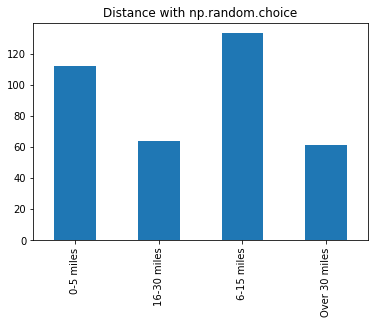

In [12]:
# create an indexed dataframe with the number of counts
# code adapted from https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.from_dict.html
df_dist_ch = pd.DataFrame.from_dict(dist_counts_ch, orient='index')
                      
#plot the bar chart of the distance counts
df_dist_ch.plot(kind='bar', title='Distance with np.random.choice', legend = False)
plt.show()

If we want to look beyond Cassidy's survey then the distribution of the commute distance should be investigated. 

#### Distribution


Firstly a note about problems I found modeling these distributions. 

#### Difficulties

A factor that hindered the development of this report was identifying parameters from datasets that did not exactly match,  either in content or format, the data required for this report. A great deal of time was spent in trying to fit a square peg into a round hole. After some research the decision was made to use parameters that were estimated from other published research where possible. Variables where no data could be found by research would be estimated by importing a dataset and calculating the parameters. To this extent parameters were found for the distance, duration and impedance variables. The parameters for the time variable were estimated by employment (job) tenure data or job churn. 

#### Distance  of commute distribution

Beige, 2012 investigated commuting behaviour. His focus was on developing a better model for the distribution of where people live homes and work. Beige (2012) analysed commuting distances and times of people who worked and lived in Berlin. The data used came from the household mobility survey for cities. The aim of this survey was to create a database of typical travel behavour. The survey was commissioned by the Chair of Transport and Infrastructure Planning Dresden. Beige (2012) focused on data from 2008. This contained responses from 39,000 individuals representing almost 18,400 households. He investigated the 12 boroughs of Berlin and their residents home/work travel patterns. Beige 2012 found that the mean commuting distance was 14.288 kilometers with a standard deviation of 26.372. A figure from his report can be found below. 

![commute distance](https://github.com/Osheah/images/raw/master/commute-stress/img/commute-distance.JPG)

#### Describe the plot

This shows that the data is positively skewed. It looks like it could be suitably modeled by a non negative distribution that is positively skewed. Possible distributions include Lognormal, Gamma, Weibull and Burr. Other research typically choose lognormal to model traveling distance (Johar et al, 2015; Van Ommeren, 2004; Weijschede et al, 2011; Plötz et al, 2014). NumPy Random's lognormal distribution was chosen to generate random data from this distribution (Numpy community, 2018). 

The characteristics of a lognormal distribution are are 

* distribution is right skewed
* distribution starts at 0 and is increasing to the mode value after which it decreases
* the skewness degree increases as the standard deviation increases for a given mean. 

Reliability HotWire (2005)




Cassidy's model could be improved by adding distribution information in the generation of the distances. As noted above the distribution used to model distance was lognormal. The parameters given in Beige's report were $\mu = 14.288$ kilometers and $\sigma = 26.372$ kilometers. 

NumPy community, (2018) and Oliphant,(2006) note that the parameters for lognormal use the $\mu$ and $\sigma$ for the **underlying normal distribution** hence the values need to be transformed before they can be used to generate random numbers from a lognormal distribution. The transformation calculations were taken from Civil and Environmental Engineering Course, 2005. 

In [13]:
# transform data 
# first change it to mph
kmtomiles = 1/1.609344
print("multiply by ", f"{kmtomiles:.6}", " to change km units to miles")
mu_dist_y = 14.288*kmtomiles
# Standard deviation is the same units as mean so can also be converted to miles. 
sigma_dist_y = 26.372*kmtomiles
# convert lognormal values to normal values so that they can be entered into numpy randoms lognormal function
# calc taken from https://ocw.mit.edu/courses/civil-and-environmental-engineering/1-151-probability-and-statistics-in-engineering-spring-2005/lecture-notes/briefnts8_relnl.pdf
# reasoning taken from https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.lognormal.html#numpy.random.lognormal
mu_dist_x = 2*math.log(mu_dist_y)-0.5*math.log(sigma_dist_y**2 + mu_dist_y**2)
sigma_dist_x = math.sqrt(-2*math.log(mu_dist_y) + math.log(sigma_dist_y**2+mu_dist_y**2))
print("The parameters for the lognormal distance distribution are mean of ", f"{mu_dist_x:.3}", " \n and standard deviation of ", f"{sigma_dist_x:.3}")

multiply by  0.621371  to change km units to miles
The parameters for the lognormal distance distribution are mean of  1.44  
 and standard deviation of  1.22


Next generate the random values from the lognormal distribution using NumPy Random's lognormal function. 


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


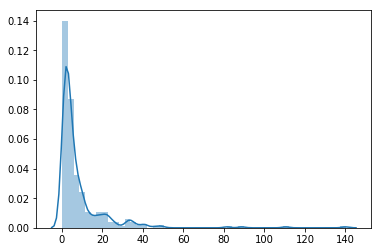

The first few values of  the lognormal distance distribution are 
 [0.27649687 1.18931772 3.44236285 2.73629131 0.57042159 7.00377756
 0.84361318]


In [14]:
y_dist_rw = np.random.lognormal([(mu_dist_x)], sigma_dist_x, size)  
sns.distplot(y_dist_rw)
plt.show()
print("The first few values of  the lognormal distance distribution are \n", y_dist_rw[:7])



In [15]:
# change numbers to bands but before this put in series
# values need to be initialised/cleared first especially if this cell is run more than once with values already present. 
df['rwDistance1'] = ""
df['rwDistance2'] = ""
df['rwDistance3'] = ""
df['rwDistance4'] = ""
df['rwDistance5'] = ""
print("Change the y_dist distance array to a dataframe and add it to the simulated model.")
df['Distance'] = pd.Series(y_dist_rw)
df.loc[df['Distance'] < 6, 'rwDistance1'] = '0-5 miles'
df.loc[(df['Distance'] >= 6) & (df['Distance'] < 16), 'rwDistance2'] = '6-15 miles' 
df.loc[(df['Distance'] >= 16) & (df['Distance'] < 30), 'rwDistance3'] = '16-30 miles'
df.loc[df['Distance'] >= 30, 'rwDistance4'] = 'Over 30 miles'
df['Distance'] = df['rwDistance1']+df['rwDistance2']+df['rwDistance3']+df['rwDistance4']
df.drop(['rwDistance1', 'rwDistance2', 'rwDistance3', 'rwDistance4', 'rwDistance5'], axis=1, inplace = True)
df.head()



Change the y_dist distance array to a dataframe and add it to the simulated model.


,Distance,Duration,Time,Impedance,Stress,Distance-ch
0,0-5 miles,NaN,NaN,NaN,NaN,0-5 miles
1,0-5 miles,NaN,NaN,NaN,NaN,16-30 miles
2,0-5 miles,NaN,NaN,NaN,NaN,6-15 miles
3,0-5 miles,NaN,NaN,NaN,NaN,6-15 miles
4,0-5 miles,NaN,NaN,NaN,NaN,0-5 miles


In [16]:
# check the end of the dataframe
df.tail()

,Distance,Duration,Time,Impedance,Stress,Distance-ch
365,0-5 miles,NaN,NaN,NaN,NaN,0-5 miles
366,6-15 miles,NaN,NaN,NaN,NaN,16-30 miles
367,0-5 miles,NaN,NaN,NaN,NaN,16-30 miles
368,16-30 miles,NaN,NaN,NaN,NaN,0-5 miles
369,6-15 miles,NaN,NaN,NaN,NaN,16-30 miles


In [17]:
# check the info on the dataframe
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 370 entries, 0 to 369
Data columns (total 6 columns):
Distance       370 non-null object
Duration       0 non-null object
Time           0 non-null object
Impedance      0 non-null object
Stress         0 non-null object
Distance-ch    370 non-null object
dtypes: object(6)
memory usage: 17.4+ KB


In [18]:
# check the bands on the dataframe
df.nunique()

Distance       4
Duration       0
Time           0
Impedance      0
Stress         0
Distance-ch    4
dtype: int64

Lets plot the histogram of the commute distance bands. To plot the histogram the number of values in each duration band needs to be calculated. 

In [19]:
# calculate the number of responses to each distance band
dist_counts = Counter(df['Distance'])
# check to see if counts look reasonable
dist_counts


Counter({'0-5 miles': 240,
         '6-15 miles': 74,
         '16-30 miles': 33,
         'Over 30 miles': 23})

In [20]:
# sum counts
# list the values
dist_counts.values()
# sum the values
sum(dist_counts.values())

370

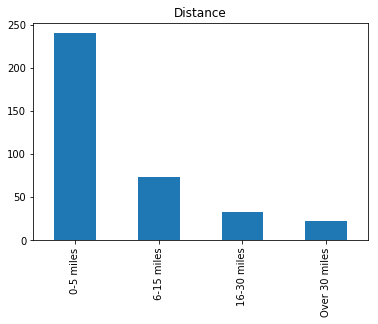

In [21]:
# create an indexed dataframe with the number of counts
# code adapted from https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.from_dict.html
#(Pandas community, 2018)
df_dist = pd.DataFrame.from_dict(dist_counts, orient='index')
                      
#plot the bar chart of the distance counts
df_dist.plot(kind='bar', title='Distance', legend = False)
plt.show()

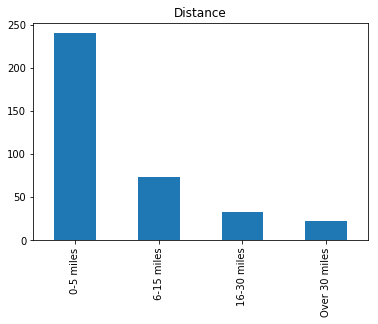

In [22]:
# set the order in which the plots are displayed for easier comparisons
df_dist.reindex(['0-5 miles', '6-15 miles',  '16-30 miles', 'Over 30 miles']).plot(kind='bar', title='Distance', legend = False)
plt.show()

This shows that most simulated participants traveled between 6 and 15 miles with the second longest duration being 0-5 miles. The other two bands had lower reported values. This compares favourably to Cassidy's findings of 109 traveling under 0.5 miles, 114 traveling between 6-15 miles, 67 traveling between 16-30 miles and 56 traveling over 30 miles. 


In [23]:
# create Cassidy's Distance counts as a dataframe
cass_dist = pd.DataFrame(np.array([[109, 114, 67, 56]]), columns=['0-5 miles', '6-15 miles',  '16-30 miles', 'Over 30 miles'])
cass_dist = cass_dist.transpose()
# check shape
cass_dist.head()


,0
0-5 miles,109
6-15 miles,114
16-30 miles,67
Over 30 miles,56


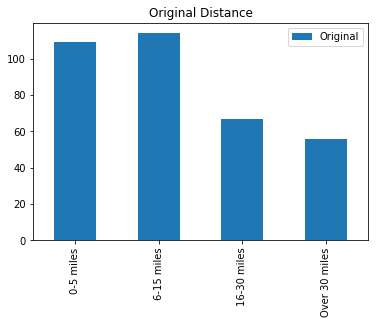

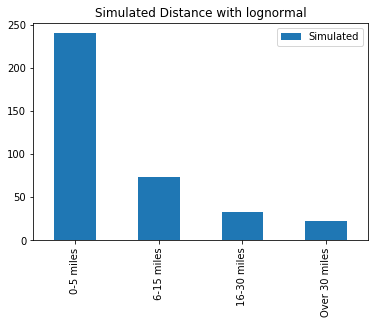

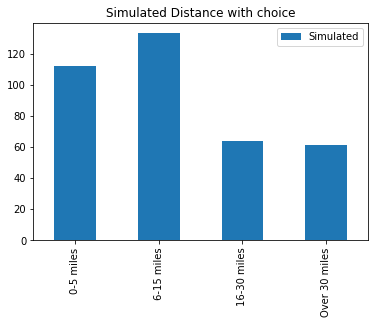

In [24]:
# set the order in which the plot displays the various bars for the original data
cass_dist.reindex(['0-5 miles', '6-15 miles',  '16-30 miles', 'Over 30 miles']).plot(kind='bar', title='Original Distance')
plt.legend(["Original"])
# set the order in which the plot displays the various bars for the simulated data
df_dist.reindex(['0-5 miles', '6-15 miles',  '16-30 miles', 'Over 30 miles']).plot(kind='bar', title='Simulated Distance with lognormal')
plt.legend(["Simulated"]);
df_dist_ch.reindex(['0-5 miles', '6-15 miles',  '16-30 miles', 'Over 30 miles']).plot(kind='bar', title='Simulated Distance with choice')
plt.legend(["Simulated"]);

plt.show()

# to do figure out how to display both histograms/bars side by side on the same plot


From the plots above the np.random.choice model fits Cassidy's data better but the np.random.lognormal model is better as a representative of the population. 

### Duration
Lets add the duration data. In Cassidy's study the duration of commute was as follows; 137 participants had 0-30 minutes duration; 121 participants had a commute duration of 30-60 minutes and 97 participants commuting time was over 60 minutes (Cassidy, 1992). This was initially simulated with np.random.choice. 

#### Why?

NumPy Random's choice was used to initially simulate the duration of commute. There are three bands and the data is ordinal, as there is a progression from 30 minutes to over 60 minutes. However as these choices were items on a survey NumPy Random's 'choice' function would be suitable as a model. There was a total of 355 responses to this section of the survey so this was taken as the total when calculating the probability weightings for each of the duration bands. A 'Duration' array was created containing the three duration bands, 0 to 30 minutes, 30- 60 minutes and over 60 minutes. There were 137 responses in the first band so this was weighted as 137/355, 121 for the second band giving a probability of 121/355 and 97 responses for the Over 60 minutes response giving a weighting of 97/355.  The first pass at the model of the Duration variable can be found below.


In [25]:
# add the duration categories
duration = ['0-30 minutes', '30-60 minutes', 'Over 60 minutes']
# check its added
print("The duration of the commute is ", duration)

The duration of the commute is  ['0-30 minutes', '30-60 minutes', 'Over 60 minutes']


In [26]:
# calculate the total number of responses to this question
tot_dur = 137+121+97
# check its added
print("The number of respondants to the duration of commute question is ", tot_dur)

The number of respondants to the duration of commute question is  355


In [27]:
# generate the responses to the 'Duration' category
y_dur = np.random.choice(duration, size, p=[137/tot_dur, 121/tot_dur, 97/tot_dur])
# check the first few values of the array
y_dur[:7]


array(['0-30 minutes', '0-30 minutes', '30-60 minutes', '30-60 minutes',
       '30-60 minutes', '0-30 minutes', '0-30 minutes'], dtype='<U15')

In [28]:
df['Duration-ch'] = pd.Series(y_dur)
df.head()


,Distance,Duration,Time,Impedance,Stress,Distance-ch,Duration-ch
0,0-5 miles,NaN,NaN,NaN,NaN,0-5 miles,0-30 minutes
1,0-5 miles,NaN,NaN,NaN,NaN,16-30 miles,0-30 minutes
2,0-5 miles,NaN,NaN,NaN,NaN,6-15 miles,30-60 minutes
3,0-5 miles,NaN,NaN,NaN,NaN,6-15 miles,30-60 minutes
4,0-5 miles,NaN,NaN,NaN,NaN,0-5 miles,30-60 minutes


In [29]:
# calculate the number of responses to each duration band
dur_counts_ch = Counter(df['Duration-ch'])
# check to see if counts look reasonable
dur_counts_ch


Counter({'0-30 minutes': 152, '30-60 minutes': 115, 'Over 60 minutes': 103})

In [30]:
# sum counts
# list the values
dur_counts_ch.values()
# sum the values
sum(dur_counts_ch.values())

370

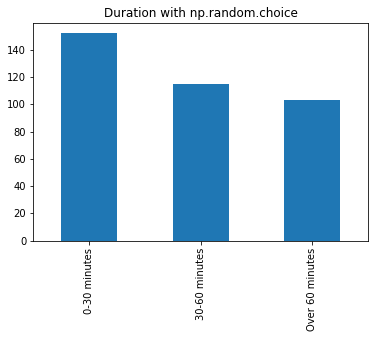

In [31]:
# create an indexed dataframe with the number of counts
# code adapted from https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.from_dict.html
#(Pandas community, 2018)
df_dur_ch = pd.DataFrame.from_dict(dur_counts_ch, orient='index')
                      
#plot the bar chart of the duration counts
df_dur_ch.plot(kind='bar', title='Duration with np.random.choice', legend = False)
plt.show()

#### Distribution

#### Duration of commute distribution


Stutzer & Frey (2008) in their paper for the Scandinavian Journal of Economics titled *Stress  that  Doesn’t  Pay: The  Commuting  Paradox* reported commuting time in Germany from 1985-2003. They found that the average commute was 22 minutes per journey, i.e. 44 minutes round trip with a standard deviation of 18 minutes.
They found long distance commuters who travel over an hour a day comprised of 6.8 percent of the sample. A figure of these findings is presented below.  

![commute duration distribution stutzer & Frey](https://github.com/Osheah/images/raw/master/commute-stress/img/commute-time.JPG)

Beige, 2012 also investigated commuting times in his large 2008 dataset of Berliner commuters. Like Stutzer & Frey he found a similarly shaped distribution (See the figure below) however the commuting times in minutes had a mean of 34.450 minutes and a standard deviation of standard deviation 24.208. 

![commute duration distribution beige](https://github.com/Osheah/images/raw/master/commute-stress/img/commute-time-beige.JPG)

As parameter data for the distance came from Beige's 2012 study, his parameters for time (which Cassidy terms duration) were used in generating random data.


Weifeng et al (2013) investigated travel time distributions. They found that the best goodness of fit was the lognormal distribution. Other research also indicates that lognormal is frequenly used to model travel time Guessous, 2014; Ma et al, 2015). However there is a great deal of variation in the models used depending on the routes taken and the method of transportation amongst other factors(Büchel & Corman, 2018).

The parameters from Beige (2012)of the lognormal distribution were $\mu = 34.450$ minutes and $\sigma = 24.208$ minutes. 


In [32]:
# transform data parameters
mu_dur_y = 34.450
sigma_dur_y = 24.208
# convert lognormal values to normal values so that they can be entered into numpy randoms lognormal function
# calc taken from https://ocw.mit.edu/courses/civil-and-environmental-engineering/1-151-probability-and-statistics-in-engineering-spring-2005/lecture-notes/briefnts8_relnl.pdf
# reasoning taken from https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.lognormal.html#numpy.random.lognormal
mu_dur_x = 2*math.log(mu_dur_y)-0.5*math.log(sigma_dur_y**2 + mu_dur_y**2)
sigma_dur_x = math.sqrt(-2*math.log(mu_dur_y) + math.log(sigma_dur_y**2+mu_dur_y**2))
print("The parameters for the lognormal duration distribution are mean of ", f"{mu_dur_x:.3}", " and standard deviation of ", f"{sigma_dur_x:.3}")

The parameters for the lognormal duration distribution are mean of  3.34  and standard deviation of  0.633


Next generate the random values from the lognormal distribution using NumPy Random's lognormal function. 


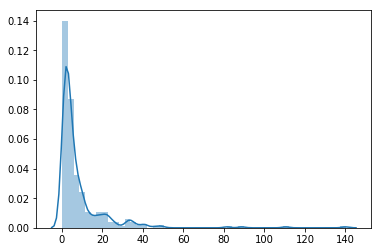

The first few values of the duration array are 
  [ 61.52282702 136.49107268  51.70033136  42.2484321   13.14061217
  65.85610108  48.91636543]


In [33]:
y_dur_rw = np.random.lognormal(mu_dur_x, sigma_dur_x, size)
sns.distplot(y_dist_rw)
plt.show()
print("The first few values of the duration array are \n ",y_dur_rw[:7])



In [34]:
# change numbers to bands but before this put in series
# temp values need to be cleared first
df['rwDuration1'] = ""
df['rwDuration2'] = ""
df['rwDuration3'] = ""

print("Change the y_dur_rw duration array to a dataframe and add it to the simulated model.")
df['Duration'] = pd.Series(y_dur_rw)
df.loc[df['Duration'] < 30, 'rwDuration1'] = '0-30 minutes'
df.loc[(df['Duration'] >= 30) & (df['Duration'] < 60), 'rwDuration2'] = '30-60 minutes' 
df.loc[df['Duration'] >= 60, 'rwDuration3'] = 'Over 60 minutes'
df['Duration'] = df['rwDuration1']+df['rwDuration2']+df['rwDuration3']
df.drop(['rwDuration1', 'rwDuration2', 'rwDuration3'], axis=1, inplace = True)
df.head()



Change the y_dur_rw duration array to a dataframe and add it to the simulated model.


,Distance,Duration,Time,Impedance,Stress,Distance-ch,Duration-ch
0,0-5 miles,Over 60 minutes,NaN,NaN,NaN,0-5 miles,0-30 minutes
1,0-5 miles,Over 60 minutes,NaN,NaN,NaN,16-30 miles,0-30 minutes
2,0-5 miles,30-60 minutes,NaN,NaN,NaN,6-15 miles,30-60 minutes
3,0-5 miles,30-60 minutes,NaN,NaN,NaN,6-15 miles,30-60 minutes
4,0-5 miles,0-30 minutes,NaN,NaN,NaN,0-5 miles,30-60 minutes


Change the y_dur duration array to a dataframe and add it to the simulated model. 

In [35]:
# check that the end of the dataframe looks okay
df.tail()

,Distance,Duration,Time,Impedance,Stress,Distance-ch,Duration-ch
365,0-5 miles,0-30 minutes,NaN,NaN,NaN,0-5 miles,Over 60 minutes
366,6-15 miles,Over 60 minutes,NaN,NaN,NaN,16-30 miles,30-60 minutes
367,0-5 miles,Over 60 minutes,NaN,NaN,NaN,16-30 miles,0-30 minutes
368,16-30 miles,0-30 minutes,NaN,NaN,NaN,0-5 miles,Over 60 minutes
369,6-15 miles,30-60 minutes,NaN,NaN,NaN,16-30 miles,Over 60 minutes


Lets plot the histogram of the commute duration bands

In [36]:
# calculate the number of responses to each duration band
dur_counts = Counter(df['Duration'])
# check the number
print("The number in each of the duration bands is ", dur_counts)

The number in each of the duration bands is  Counter({'0-30 minutes': 198, '30-60 minutes': 130, 'Over 60 minutes': 42})


In [37]:
# create an indexed dataframe with the number of counts
df_dur = pd.DataFrame.from_dict(dur_counts, orient='index')
# check it looks okay
df_dur


,0
Over 60 minutes,42
30-60 minutes,130
0-30 minutes,198


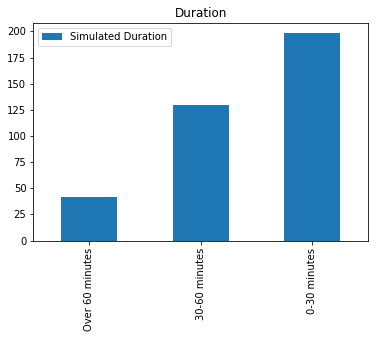

In [38]:
#plot the bar chart of the duration counts
df_dur.plot(kind='bar', title='Duration')
plt.legend(["Simulated Duration"]);
plt.show()

In [39]:
# create Cassidy's Duration counts as a dataframe
cass_dur = pd.DataFrame(np.array([[137, 121, 97]]), columns=['0-30 minutes', '30-60 minutes',  'Over 60 minutes'])
cass_dur = cass_dur.transpose()
# check shape
cass_dur.head()


,0
0-30 minutes,137
30-60 minutes,121
Over 60 minutes,97


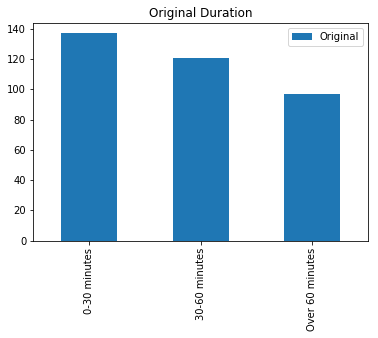

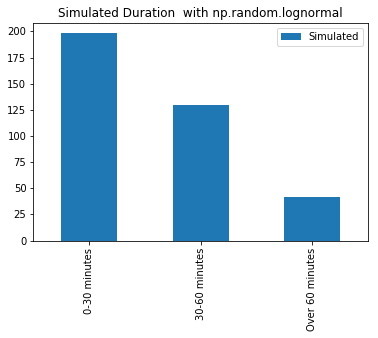

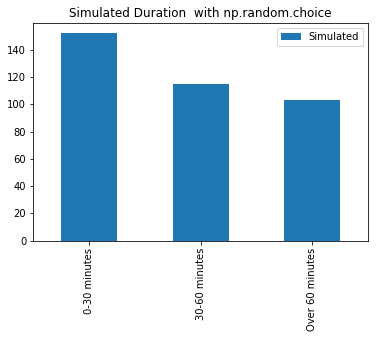

In [40]:
# set the order in which the plot displays the various bars for the original data
cass_dur.reindex(['0-30 minutes', '30-60 minutes',  'Over 60 minutes']).plot(kind='bar', title='Original Duration')
plt.legend(["Original"])
# set the order in which the plot displays the various bars for the simulated data
df_dur.reindex(['0-30 minutes', '30-60 minutes',  'Over 60 minutes']).plot(kind='bar', title='Simulated Duration  with np.random.lognormal')
plt.legend(["Simulated"]);
df_dur_ch.reindex(['0-30 minutes', '30-60 minutes',  'Over 60 minutes']).plot(kind='bar', title='Simulated Duration  with np.random.choice')
plt.legend(["Simulated"])
plt.show()


# to do figure out how to display both histograms/bars side by side on the same plot


This shows that durations of over an hour were not as common as durations between 0- 30 minutes (the most popular commute duration in Cassidy's study (1992)) with 30-60 minutes being the second most common duration of commute for the participants in the survey.  Again as with the distance model, Cassidy's data is best modeled by np.random.choice

### Time

Lets add the time data. In Cassidy's study the time commuting does not refer to the duration of the commute but to the overall time participants spent as a commuter traveling this duration. This is commonly referred to in economics as employment or job tenure (OECD Statistics Directorate, 2002). It could also be interpreted as a measure of job churn (Wikipedia contributors, December 3 2018).   There was 343 respondents to this question on the survey with 73 responses indicating a commuting time of 1-29 months, 99 commuting for between 30 and 60 months, 80 commuting between 60 and 131 months and 132 participants commuting for over 132 months (Cassidy, 1992).  This was initially simulated with np.random.choice. 

#### Why?

NumPy Random's choice was used to simulate the time spent commuting. There are four bands in this category. Again the data is ordinal, as there is a progression from 1 month to over 132 months.However as these choices were items on a survey NumPy Random's 'choice' function would be suitable as a model. There was a total of 343 responses to this section of the survey so this was taken as the total when calculating the probability weightings for each of the time bands. A 'Time' array was created containing the four time bands, 1 - 29 months, 30-60 months, 60-131 months and over 132 months. There were 73 responses in the first band so this was weighted as 73/343, 99 for the second band giving a probability of 99/343; 80 responses for the third band giving a weighting of 80/343 and finally 91 responses in the Over 132 month band giving a weighting of 91/343.   The first model of the Time variable can be found below.



In [41]:
# add the  time category bands
time = ['1-29 months', '30-60 months', '60-131 months', 'Over 132 months']
# check the bands
time

['1-29 months', '30-60 months', '60-131 months', 'Over 132 months']

In [42]:
# calculate the number of responses to the Time category question
tot_time = 73+99+80+91
# check the number of respondents to the time question
print("The number of respondents to the time question is ", tot_time)

The number of respondents to the time question is  343


In [43]:
# generate the time category responses with their respective weightings
y_time = np.random.choice(time, size, p=[73/tot_time, 99/tot_time, 80/tot_time, 91/tot_time])
# check the first few values look okay
y_time[:7]

array(['30-60 months', 'Over 132 months', '60-131 months', '1-29 months',
       '60-131 months', '30-60 months', '30-60 months'], dtype='<U15')

In [44]:
df['Time-ch'] = pd.Series(y_time)
df.head()


,Distance,Duration,Time,Impedance,Stress,Distance-ch,Duration-ch,Time-ch
0,0-5 miles,Over 60 minutes,NaN,NaN,NaN,0-5 miles,0-30 minutes,30-60 months
1,0-5 miles,Over 60 minutes,NaN,NaN,NaN,16-30 miles,0-30 minutes,Over 132 months
2,0-5 miles,30-60 minutes,NaN,NaN,NaN,6-15 miles,30-60 minutes,60-131 months
3,0-5 miles,30-60 minutes,NaN,NaN,NaN,6-15 miles,30-60 minutes,1-29 months
4,0-5 miles,0-30 minutes,NaN,NaN,NaN,0-5 miles,30-60 minutes,60-131 months


In [45]:
# calculate the number of responses to each time band
time_counts_ch = Counter(df['Time-ch'])
# check to see if counts look reasonable
time_counts_ch


Counter({'30-60 months': 104,
         'Over 132 months': 101,
         '60-131 months': 86,
         '1-29 months': 79})

In [46]:
# sum counts
# list the values
time_counts_ch.values()
# sum the values
sum(time_counts_ch.values())

370

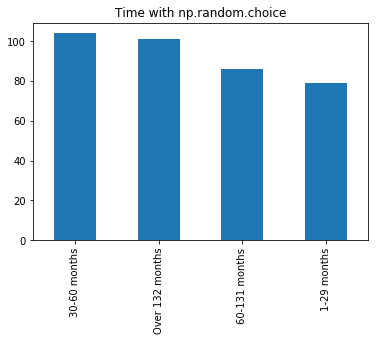

In [47]:
# create an indexed dataframe with the number of counts
# code adapted from https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.from_dict.html
#(Pandas community, 2018)
df_time_ch = pd.DataFrame.from_dict(time_counts_ch, orient='index')
                      
#plot the bar chart of the time counts
df_time_ch.plot(kind='bar', title='Time with np.random.choice', legend = False)
plt.show()

#### Distribution of commute time (length of time in commuting this distance)

Time i.e. the time spend commuting this distance was difficult to research. Hence it was assumed that the time spent in employment was equivalent job/employment tenure i.e the length of time workers stay in their current employment.
Research produced data from the OECD that measured the months spent in specific employment broken down by year and country (OECD, 2018). However these figures did not include populations only the time spend in their current employment. The United States Department of Labour, Bureau of Labour Statistics (BLS) contained information including populations and time spent in current employment which will be used to produce the parameters (U.S.A, Department of Labour, 2018). 



In [48]:
# data taken from https://www.bls.gov/news.release/pdf/tenure.pdf
# I gave up trying to minipulate the dataframe with pandas after hours and hours trying to get it to do a simple sum
# as I was running out of time in writing this assignment I did it quickly in excel
job_time = pd.read_csv("https://raw.githubusercontent.com/Osheah/datasets/master/Distribution_by_tenure_January_2018_summary.csv" ) 
job_time.head()


,12 months or less,13 to 23 months,2 years,3 to 4 years,5 to 9 years,10 to 14 years,15 to 19 years,20 years or more
0,30649.566,9483.498,7696.752,24189.792,25839.096,15943.272,9483.498,14156.526


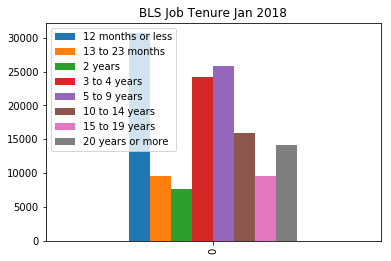

The histogram of the BLS data shows two peaks


In [49]:

job_time.plot(kind='bar')
plt.title("BLS Job Tenure Jan 2018")
plt.show()
print("The histogram of the BLS data shows two peaks")

Some assumptions were made in shaping this data in a similar way to Cassidy's data. A very loose interpretation of time bands was used. For example the band '60-131 months' i.e. 5 years to just under 11 years, in Cassidy's data was created by summing the bands '5 to 9 years' and '10 to 14 years' in the BLS data. 

['1-29 months', '30-60 months', '60-131 months', 'Over 132 months']
   12 months or less  13 to 23 months   2 years  3 to 4 years  5 to 9 years  \
0          30649.566         9483.498  7696.752     24189.792     25839.096   

   10 to 14 years  15 to 19 years  20 years or more  
0       15943.272        9483.498         14156.526  


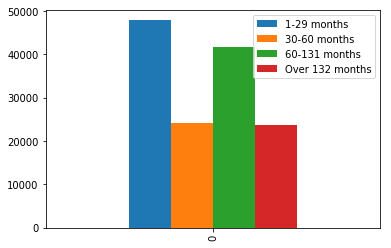

In [50]:
# Add some columns together to get a similar shape to Cassidy - make some assumptions e.g. 2 years is same as 
print(time)
print(job_time)
job_time['1-29 months'] = job_time['12 months or less']+job_time['13 to 23 months'] + job_time['2 years']
# assume these bands are roughly (very roughly) equivelant to Cassidy's
job_time['30-60 months'] = job_time['3 to 4 years']
# assume roughly equivalent to cassidy's bands - if I've time try and get a rough interpolated figure for his month divisions
job_time['60-131 months'] = job_time['5 to 9 years']+job_time['10 to 14 years'] 
job_time['Over 132 months'] = job_time['15 to 19 years']+job_time['20 years or more'] 
job_time.drop(['12 months or less', '13 to 23 months','2 years', '3 to 4 years','5 to 9 years','10 to 14 years', '15 to 19 years','20 years or more'  ], axis =1, inplace = True)
job_time.plot(kind='bar')
# quick comparision with cassidy's data
#cass_time.reindex(['1-29 months', '30-60 months', '60-131 months', 'Over 132 months']).plot(kind='bar')
plt.show()


The distribution this falls into is not clear. Papadopoulos, 1970 investigated job tenure measures via linked employer-employee data. This contained several graphs some of which are reproduced below. Job tenure is a complex distribution that depends on many factors such as type of job, level of eduction or skill etc; commuting distance is but one such factor. Job tenure depends on the type of job and the level of skill of the employee (Papadopoulos, 1970). 



[job tenure fig 1](https://github.com/Osheah/images/raw/master/commute-stress/img/tenurefig1.JPG)


[job tenure fig 3](https://github.com/Osheah/images/raw/master/commute-stress/img/tenurefig3.JPG)


[job tenure fig 4](https://github.com/Osheah/images/raw/master/commute-stress/img/tenurefig14.JPG)

These images show a U shaped distribution. Roberts, 2014 noted that this may be due to two types of distribution, people who are a good fit for their current employment (therefore tending to have longer tenure) and people who are a poor fit for their current employment (therefore tending to have short tenure). 


Patel, 2018 noted that modeling churn is difficult. He mentioned that the typical model used follows a Beta distribution which has a characteristic U shape. Hence this is the distribution that will be used to model the time variable with parameters (alpha and beta) calculated from the BLS data. The dataframe used to calculate the parameters is the original BLS one without the aggregated tenure bands.  

In [51]:
# reload the dataset and call it something other than job_time
calc_time = pd.read_csv("https://raw.githubusercontent.com/Osheah/datasets/master/Distribution_by_tenure_January_2018_summary.csv" )
calc_time.head()

,12 months or less,13 to 23 months,2 years,3 to 4 years,5 to 9 years,10 to 14 years,15 to 19 years,20 years or more
0,30649.566,9483.498,7696.752,24189.792,25839.096,15943.272,9483.498,14156.526


Calculate the parameters for the Beta distribution. This will be done via SciPy's beta.fit function. 

In [52]:
import scipy.stats
alpha, beta, loc, scale = scipy.stats.beta.fit(calc_time) # https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.beta.html
print("alpha is  ",  alpha)
print("beta is  ", beta)
print("loc is ", loc)
print("scale is ", scale)
# what are these numbers? loc? scale? alpha is lower number beta is uper number alpha and beta are between 0 and 1
# looks like the distribution needs to be rescaled from https://mathematica.stackexchange.com/questions/129413/how-to-generate-random-numbers-for-beta-distribution-in-a-range


alpha is   0.39394508619137675
beta is   0.5455135795551629
loc is  5714.949457269766
scale is  24934.61654273024


In [53]:
# looks like the distribution needs to be rescaled from https://mathematica.stackexchange.com/questions/129413/how-to-generate-random-numbers-for-beta-distribution-in-a-range
# info taken from https://mathematica.stackexchange.com/questions/129413/how-to-generate-random-numbers-for-beta-distribution-in-a-range
max = calc_time.stack().max()
min = calc_time.stack().min()
rescale = (max - min) + min
rescale
# maybe check this to get a better scale 

30649.566000000003

Plot the distribution based on the above alpha and beta parameters with numbers generated randomly from np.random.beta distribution. 

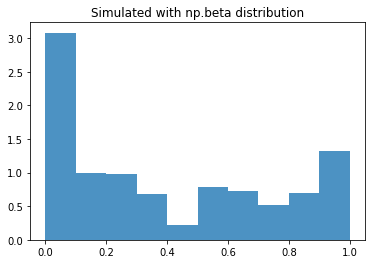

In [54]:
fig, ax = plt.subplots(1, 1)
y_time_rw = np.random.beta(alpha, beta, size)
ax.hist(y_time_rw, density=True, histtype='stepfilled', alpha=0.8)
plt.title("Simulated with np.beta distribution")
plt.show()

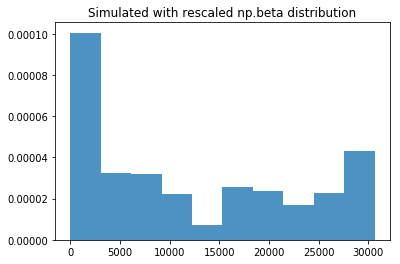

In [55]:
# rescale the list and plot it

y_time_rw_rescaled = [i * rescale for i in y_time_rw]
y_time_rw_rescaled
fig, ax = plt.subplots(1, 1)
ax.hist(y_time_rw_rescaled, density=True, histtype='stepfilled', alpha=0.8)
plt.title("Simulated with rescaled np.beta distribution")
plt.show()



The histogram and density plot of the simulated time data can be found below


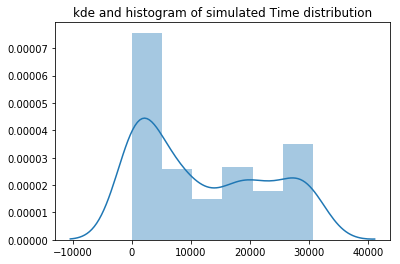

The first few values of the simulated time array are  [20377.58174962535, 7882.094237362717, 25386.22691651596, 4511.100067275688, 0.00020748545679220712, 10350.849656401213, 25969.6812267956]


['1-29 months', '30-60 months', '60-131 months', 'Over 132 months']

In [56]:
print("The histogram and density plot of the simulated time data can be found below")
sns.distplot(y_time_rw_rescaled)
plt.title("kde and histogram of simulated Time distribution")
plt.show()
print("The first few values of the simulated time array are " , y_time_rw_rescaled[:7])
time

In [57]:
# initialize the temp data fields

df['rwTime1'] = ""
df['rwTime2'] = ""
df['rwTime3'] = ""
df['rwTime4'] = ""
print("Change the y_time_rw duration array to a dataframe and add it to the simulated model.")
# put the scaled np.random.beta array into a series.
df['Time'] = pd.Series(y_time_rw_rescaled)
# set up the temp bands
df.loc[df['Time'] < 30, 'rwTime1'] = '1-29 months'
df.loc[(df['Time'] >=30) & (df['Time'] < 60), 'rwTime2'] = '30-60 months' 
df.loc[(df['Time'] >=60) & (df['Time'] < 131), 'rwTime2'] = '60-131 months'
df.loc[df['Time'] >=131, 'rwTime3'] = 'Over 132 months'
# add the temp bands to the Time field
df['Time'] = df['rwTime1']+df['rwTime2']+df['rwTime3']+df['rwTime4']
# drop the temp bands
df.drop(['rwTime1', 'rwTime2', 'rwTime3', 'rwTime4'], axis=1, inplace = True)
df.head()
 


Change the y_time_rw duration array to a dataframe and add it to the simulated model.


,Distance,Duration,Time,Impedance,Stress,Distance-ch,Duration-ch,Time-ch
0,0-5 miles,Over 60 minutes,Over 132 months,NaN,NaN,0-5 miles,0-30 minutes,30-60 months
1,0-5 miles,Over 60 minutes,Over 132 months,NaN,NaN,16-30 miles,0-30 minutes,Over 132 months
2,0-5 miles,30-60 minutes,Over 132 months,NaN,NaN,6-15 miles,30-60 minutes,60-131 months
3,0-5 miles,30-60 minutes,Over 132 months,NaN,NaN,6-15 miles,30-60 minutes,1-29 months
4,0-5 miles,0-30 minutes,1-29 months,NaN,NaN,0-5 miles,30-60 minutes,60-131 months


Change the y_time time array to a dataframe and add it to the simulated model. 

In [58]:
# check the end of the dataframe
df.tail()

,Distance,Duration,Time,Impedance,Stress,Distance-ch,Duration-ch,Time-ch
365,0-5 miles,0-30 minutes,Over 132 months,NaN,NaN,0-5 miles,Over 60 minutes,Over 132 months
366,6-15 miles,Over 60 minutes,Over 132 months,NaN,NaN,16-30 miles,30-60 minutes,60-131 months
367,0-5 miles,Over 60 minutes,Over 132 months,NaN,NaN,16-30 miles,0-30 minutes,Over 132 months
368,16-30 miles,0-30 minutes,Over 132 months,NaN,NaN,0-5 miles,Over 60 minutes,Over 132 months
369,6-15 miles,30-60 minutes,Over 132 months,NaN,NaN,16-30 miles,Over 60 minutes,Over 132 months


Lets plot the histogram of the time spent as a commuter bands

In [59]:
# calculate the number of responses to each duration band
time_counts = Counter(df['Time'])
# check the Time counters look okay
time_counts

Counter({'Over 132 months': 338,
         '1-29 months': 17,
         '60-131 months': 9,
         '30-60 months': 6})

In [60]:
# create an indexed dataframe with the number of counts
df_time = pd.DataFrame.from_dict(time_counts, orient='index')
# check the dataframe of the time counts looks okay
df_time
# bit high with the over 132 months - maybe check the rescale factor

,0
Over 132 months,338
1-29 months,17
60-131 months,9
30-60 months,6


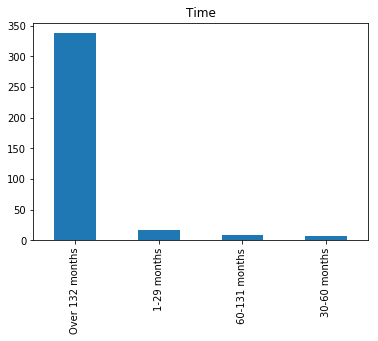

In [61]:
#plot the bar chart of the duration counts
df_time.plot(kind='bar', title='Time', legend = False)
plt.show()

This is the simulated distribution of the time variable with a Beta distribution. Lets see how it compares to Cassidy's data. 

In [62]:
# create Cassidy's Time counts as a dataframe
cass_time = pd.DataFrame(np.array([[73, 99, 80, 91]]), columns=['1-29 months', '30-60 months', '60-131 months', 'Over 132 months'])
cass_time = cass_time.transpose()
# check shape
cass_time.head()


,0
1-29 months,73
30-60 months,99
60-131 months,80
Over 132 months,91


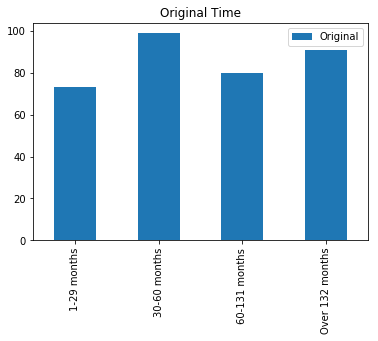

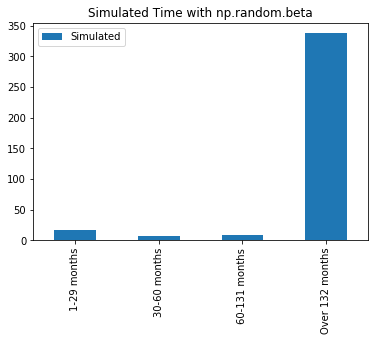

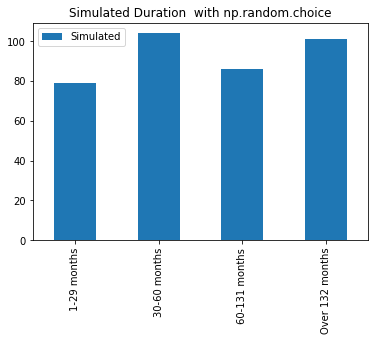

In [63]:
# set the order in which the plot displays the various bars for the original data
cass_time.reindex(['1-29 months', '30-60 months', '60-131 months', 'Over 132 months']).plot(kind='bar', title='Original Time')
plt.legend(["Original"])
# set the order in which the plot displays the various bars for the simulated data
df_time.reindex(['1-29 months', '30-60 months', '60-131 months', 'Over 132 months']).plot(kind='bar', title='Simulated Time with np.random.beta')
plt.legend(["Simulated"]);
df_time_ch.reindex(['1-29 months', '30-60 months', '60-131 months', 'Over 132 months']).plot(kind='bar', title='Simulated Duration  with np.random.choice')
plt.legend(["Simulated"])
plt.show()
# to do figure out how to display both histograms/bars side by side on the same plot


This shows that the most common timeframe of being a commuter in the study was 30-60 months and the least common one was 1-29 months. The simulated data is broadly similar to Cassidy's study in this respect with np.random.choice model but does not resemble Cassidy's study with the np.random.beta model. Possibly the distribution chosen is not the correct one or the rescaling factor is too big. It may also be that with such a large population sample in the dataframe used for the Beta distribution, variation that is not present in a sample size of 370 emerge.   

Cassidy's study shows that the most popular time lengths of commuting was 30-60 months (2.5 - 5 years), followed closely by 60-131 years (5 - approx 11 years) then 1-29 months ( up to 2.5 years) closely followed by over 132 months (11 years +)

### Impedance

Lets add the impedance data. In Cassidy's study the impedance (or speed traveled on the commute) was divided into three bands. All participants responded to this question on the survey. The majority of them (207) reported speeds of 17 mph or less as a hindering factor; 97 respondents reported speeds between 13.3 and 30 mph and 66 reported speeds over 30 mph. Again this was simulated with np.random.choice at first. 

#### Why?

NumPy Random's choice was used to simulate the time spent commuting. There are three bands in this category, 17 mph or less, 17.3 - 30 mph and Over 30 mph. Again the data is ordinal, as there is a progression from 17 mph to over 30 mph. However as these choices were items on a survey NumPy Random's 'choice' function would be suitable as a model. There was a total of 370 responses to this section of the survey so this was taken as the total when calculating the probability weightings for each of the time bands (which in this case was the number of people surveyed). An 'Impedance' array was created containing the three impedance bands. There were 207 responses in the first band so this was weighted as 207/370, 97 for the second band giving a probability of 97/370; 66 responses for the third band giving a weighting of 66/370. The model of the Impedance variable can be found below.

In [64]:
# create the impedance bands
impedance = ['17 mph or less', '17.3-30 mph', 'Over 30 mph']
# check the list
impedance

['17 mph or less', '17.3-30 mph', 'Over 30 mph']

In [65]:
# calculate the number of responses to the impedance question
tot_imp = 207+97+66
print("The number of respondents to the Impedance question is  ", tot_imp)

The number of respondents to the Impedance question is   370


In [66]:
# generate responses to the impedence question
y_imp = np.random.choice(impedance, size, p=[207/tot_imp, 97/tot_imp, 66/tot_imp])
# check the first few values on the array
y_imp[:7]

array(['Over 30 mph', '17 mph or less', '17 mph or less', '17.3-30 mph',
       '17.3-30 mph', 'Over 30 mph', '17 mph or less'], dtype='<U14')

Change the y_imp impedance array to a dataframe and add it to the simulated model. 

In [67]:
df['Impedance-ch'] = pd.Series(y_imp)
df.head()


,Distance,Duration,Time,Impedance,Stress,Distance-ch,Duration-ch,Time-ch,Impedance-ch
0,0-5 miles,Over 60 minutes,Over 132 months,NaN,NaN,0-5 miles,0-30 minutes,30-60 months,Over 30 mph
1,0-5 miles,Over 60 minutes,Over 132 months,NaN,NaN,16-30 miles,0-30 minutes,Over 132 months,17 mph or less
2,0-5 miles,30-60 minutes,Over 132 months,NaN,NaN,6-15 miles,30-60 minutes,60-131 months,17 mph or less
3,0-5 miles,30-60 minutes,Over 132 months,NaN,NaN,6-15 miles,30-60 minutes,1-29 months,17.3-30 mph
4,0-5 miles,0-30 minutes,1-29 months,NaN,NaN,0-5 miles,30-60 minutes,60-131 months,17.3-30 mph


In [68]:
# calculate the number of responses to each time band
imp_counts_ch = Counter(df['Impedance-ch'])
# check to see if counts look reasonable
imp_counts_ch


Counter({'Over 30 mph': 68, '17 mph or less': 208, '17.3-30 mph': 94})

In [69]:
# sum counts
# list the values
imp_counts_ch.values()
# sum the values
sum(imp_counts_ch.values())

370

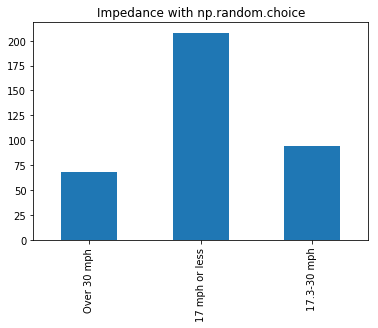

In [70]:
# create an indexed dataframe with the number of counts
# code adapted from https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.from_dict.html
#(Pandas community, 2018)
df_imp_ch = pd.DataFrame.from_dict(imp_counts_ch, orient='index')
                      
#plot the bar chart of the time counts
df_imp_ch.plot(kind='bar', title='Impedance with np.random.choice', legend = False)
plt.show()

#### Distribution

#### Impedance of commute distribution

There are many ways to model impedance or traffic speed. It has been modeled by Gamma, Lognormal, Burr and Weibull distributions to name a few.  to Impedance traffic speed can be modeled by gamma, lognormal, weibull and burr it depends on the vehicle and other conditions (Maurya, 2015). Maurya et al, 2015 investigated several distributions on different types of roads traversed by different types of vehicles. This contained parameters for a lognormal distribution with $\mu = 47.66$ kilometers and $\sigma = 15.08$ kilometers. This is vastly different from Cassidy's data which has most participants reporting speeds of 17 miles or less (i.e. about 27 km).

In [71]:
print("17 miles is ", f"{17*1/kmtomiles:.3}", "kilometers")

17 miles is  27.4 kilometers


For this reason it was decided to use Cassidy's own data in calculating parameters for the chosen distribution lognormal. 

[speed limits](https://github.com/Osheah/images/raw/master/commute-stress/img/speed.jpg)

In Cassidy's data, the number of respondents reported speeds at or lower than 17 mph as the greatest impedance. The figures were 207 participants at the 17 mph or less, 97 participants reporting speeds of 17.3-30 mph (assume 17.3 is 17)and 66 respondents reporting speeds of over 66 mph. The mean speed and its standard deviation are calculated below. A top speed of 60 is assumed and a minimum speed of 0. 

In [72]:
# check
print("calculate the mean speed using midpoint of intervals and assuming the maximum and minimum speeds are 0 and 40mph speed")
# reference https://www.bbc.com/news/uk-scotland-highlands-islands-29792420

mp1=0+(17-0)/2
mp2 =17+(30-17)/2
mp3 = 30+(60-30)/2
denom = 207+97+66
imp_mean = (mp1*207 + mp2*97+ mp3*66)/denom
imp_std = ((((mp1-imp_mean)**2)*207+ ((mp2 - imp_mean)**2)*97+ ((mp3-imp_mean)**2)*66)/denom)**0.5
print("given the assumptions, the average speed is ", f"{imp_mean:.4}", "\n with a standard deviation of ", f"{imp_std:.3}")

calculate the mean speed using midpoint of intervals and assuming the maximum and minimum speeds are 0 and 40mph speed
given the assumptions, the average speed is  18.94 
 with a standard deviation of  13.7


The distribution of speed is complex. It depends on many factors including type of road, type of vehicle, rural or urban environment and traffic flow. For free flowing traffic a normal distribution can be assumed (Salter, 1989; Geistefeldt, 2015).

Next generate the random values from the normal distribution using NumPy Random's normal function and the specified mean and standard deviation. 


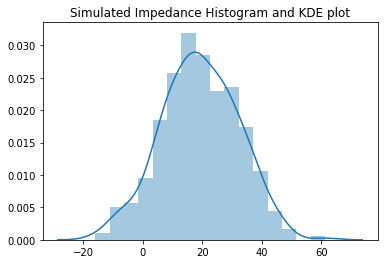

In [73]:
y_imp_rw = np.random.normal(imp_mean, imp_std, size)
sns.distplot(y_imp_rw)
plt.title("Simulated Impedance Histogram and KDE plot")
plt.show()



In [74]:
y_imp_rw
# change numbers to bands but before this put in series
# temp values need to be cleared first when testing - this can be removed when its working but only if your going to run it once with cleared cells. 
df['rwImpedance1'] = ""
df['rwImpedance2'] = ""
df['rwImpedance3'] = ""
print("Change the y_imp_rw duration array to a dataframe and add it to the simulated model.")
df['Impedance'] = pd.Series(y_imp_rw)
df.loc[df['Impedance'] <= 17, 'rwImpedance1'] = '17 mph or less'
df.loc[(df['Impedance'] > 17) & (df['Impedance'] <= 30), 'rwImpedance2'] = '17.3-30 mph' 
df.loc[df['Impedance'] > 30, 'rwImpedance3'] = 'Over 30 mph'
df['Impedance'] = df['rwImpedance1']+df['rwImpedance2']+df['rwImpedance3']
df.drop(['rwImpedance1', 'rwImpedance2', 'rwImpedance3'], axis=1, inplace = True)
df.head()


Change the y_imp_rw duration array to a dataframe and add it to the simulated model.


,Distance,Duration,Time,Impedance,Stress,Distance-ch,Duration-ch,Time-ch,Impedance-ch
0,0-5 miles,Over 60 minutes,Over 132 months,17 mph or less,NaN,0-5 miles,0-30 minutes,30-60 months,Over 30 mph
1,0-5 miles,Over 60 minutes,Over 132 months,17 mph or less,NaN,16-30 miles,0-30 minutes,Over 132 months,17 mph or less
2,0-5 miles,30-60 minutes,Over 132 months,17 mph or less,NaN,6-15 miles,30-60 minutes,60-131 months,17 mph or less
3,0-5 miles,30-60 minutes,Over 132 months,Over 30 mph,NaN,6-15 miles,30-60 minutes,1-29 months,17.3-30 mph
4,0-5 miles,0-30 minutes,1-29 months,17.3-30 mph,NaN,0-5 miles,30-60 minutes,60-131 months,17.3-30 mph


In [75]:
# check the end of the dataframe looks okay
df.tail()

,Distance,Duration,Time,Impedance,Stress,Distance-ch,Duration-ch,Time-ch,Impedance-ch
365,0-5 miles,0-30 minutes,Over 132 months,Over 30 mph,NaN,0-5 miles,Over 60 minutes,Over 132 months,17 mph or less
366,6-15 miles,Over 60 minutes,Over 132 months,17 mph or less,NaN,16-30 miles,30-60 minutes,60-131 months,17.3-30 mph
367,0-5 miles,Over 60 minutes,Over 132 months,17.3-30 mph,NaN,16-30 miles,0-30 minutes,Over 132 months,17.3-30 mph
368,16-30 miles,0-30 minutes,Over 132 months,17.3-30 mph,NaN,0-5 miles,Over 60 minutes,Over 132 months,17 mph or less
369,6-15 miles,30-60 minutes,Over 132 months,17.3-30 mph,NaN,16-30 miles,Over 60 minutes,Over 132 months,17.3-30 mph


Lets plot the histogram of the impedance distance bands

In [76]:
# calculate the number of responses to each impedance band
imp_counts = Counter(df['Impedance'])
# check the counts look okay
imp_counts

Counter({'17 mph or less': 161, 'Over 30 mph': 74, '17.3-30 mph': 135})

In [77]:
# create an indexed dataframe with the number of counts
df_imp = pd.DataFrame.from_dict(imp_counts, orient='index')
# check the counts dataframe for impedence looks okay
df_imp


,0
17 mph or less,161
Over 30 mph,74
17.3-30 mph,135


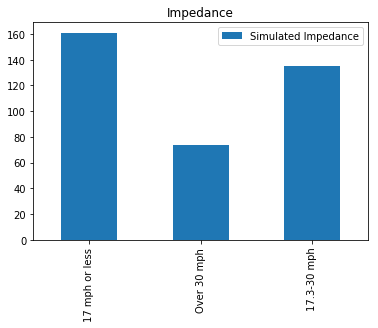

In [78]:
#plot the bar chart of the duration counts
df_imp.plot(kind='bar', title='Impedance')
plt.legend(["Simulated Impedance"])
plt.show()

In [79]:
# create Cassidy's Time counts as a dataframe
cass_imp = pd.DataFrame(np.array([[207, 97, 66]]), columns=['17 mph or less', '17.3-30 mph', 'Over 30 mph'])
cass_imp = cass_imp.transpose()
# check shape
cass_imp.head()


,0
17 mph or less,207
17.3-30 mph,97
Over 30 mph,66


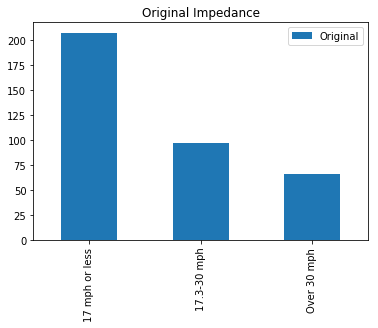

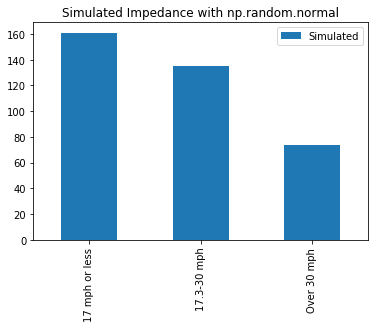

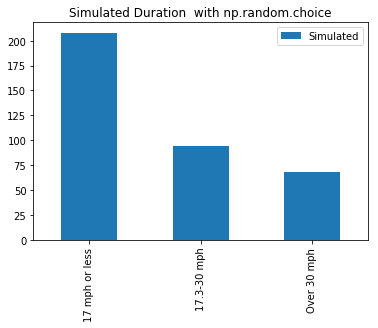

In [80]:
# set the order in which the plot displays the various bars for the original data
cass_imp.reindex(['17 mph or less', '17.3-30 mph', 'Over 30 mph']).plot(kind='bar', title='Original Impedance')
plt.legend(["Original"])
# set the order in which the plot displays the various bars for the simulated data
df_imp.reindex(['17 mph or less', '17.3-30 mph', 'Over 30 mph']).plot(kind='bar', title='Simulated Impedance with np.random.normal')
plt.legend(["Simulated"]);
df_imp_ch.reindex(['17 mph or less', '17.3-30 mph', 'Over 30 mph']).plot(kind='bar', title='Simulated Duration  with np.random.choice')
plt.legend(["Simulated"])
plt.show()

# to do figure out how to display both histograms/bars side by side on the same plot


This showed that the most common type of impedance was speeds under 17 mph with much less reported difficulty with the other two bands. The over 30 mph was reported as having the lowest impedance. The figures produced with the choice function appear to be a better match to Cassidy's data however the figures produced with the normal function are better representatives of the general driving population. Again there are a lot of assumptions made as traffic speed is complex. 

So far the 'independent type variables' (they are  not really independent as this is a correlational  investigation so all variables are equally treated) of distance, duration, time and impedance have been modeled. It is assumed that these have an effect on the ' dependent type variable' (again its not really a dependent variable - correlational study) of stress. As noted above stress is complex and has many factors affecting it over many domains but for simplicity one general domain is assumed. Stress will modeled by answers to the PSS likert questionnaire. 

### Stress

Cassidy, (1992) measured stress over five domains, home, commute, work, leisure and personal. There was no numerical data given on these measures but three bar charts illustrated the report graphs with data from these domains. 

#### Cassidy's Stress assesment variables

Cassidy 1992 measured stress along five domains namely 
* **Home domain** - This contained measures of perceived stress including perceived financial stress, social support, time spend at home and if home time was used to mediate work related problems
* **Commuting domain** - This contained measures of perceived commuting related stress and commuting mood. 
* **Work domain** - This contained measures of perceived work related stress including the level of participants commitment to their job. Work stress measures were also collected. 
* **Leisure domain** - This contained information on the participants leisure attitude and experiences. It measured how often participants exercised and socialised and their perception of their fitness levels. 
* **Personal domain** - This measured the participants cognitive style such as their problem solving ability and whether or not the attributed events to internal or external factors. It measured participants reported levels of hopelessness, level of control, motivation, confidence and their general perceived stress. It also assessed their level of satisfaction with the direction their life was taking. 

The report contained four histogram comparison charts, one for the distance of commute, one for the duration of commute and one for the impedance of commute and one for the time spent commuting. 

##### Distance

Cassidy (1992) found that commuters who travel longer distances reported more negative commuting experiences but did not report more stress than participants traveling shorter distances. However longer distance commuters reported higher scores on motivation and job commitment measures and more positive problem solving ability and use of leisure. Cassidy noted that this suggests longer distance commuters developed coping strategies within other domains to negate the negative effects of a long commute. Commuters who traveled by car had a greater sense of control over their situation however public transport commuters were able to use their commuting time productively along one or more domain. They read, slept,caught up with work etc. Cassidy noted that while this may seem beneficial it may  have long term implications in blurring boundaries between the various domains. In Cassidy's study longer distance commuters scored lower than other participants on the intention to continue to commute at this distance. Cassidy suggested that this shows participants are aware of the negative impact long commutes are having on their other domains. 

##### Duration

Participants reported more negative and less positive responses as the duration of commute increased. There was significantly more work related stress reported for participants with higher duration of commute.

##### Impedance

This measure was the *strongest indicator of stress*. The greater the impedance i.e. the slower the speed reported significantly more negative and less positive experiences over most of the domains. Cassidy (1992) was cautious in drawing conclusions however he suggested there may be an element of 'learned helplessness' when participants cannot control the speed it takes them to and from work. 

##### Time

Cassidy (1992)found participants who were commuting for several years had more positive perceptions of their commute. This may be due to those who dislike commuting leaving the commuting pool resulting in a hardier long timer commuter population. There was some support for this in the problem solving styles of the longer commuter and their levels of optimism. However long time commuters also showed higher work commitment but lower achievement motivation. Cassidy suggested this showed their level of commitment to their job which also had negative impact on their home and leisure domain.  

### Measuring Stress

### Step 1 - Stress score on PSS

Firstly the score on the PSS was simulated as an indicator of general stress levels. This was simulated with np.random.choice as it models questions on a survey. First, a template for the 10 questions was created and answers for each question were simulated via the choice function. 

In [81]:
# create the questionnaire dataframe 
df_q = pd.DataFrame(columns = ['Question 1','Question 2','Question 3','Question 4','Question 5','Question 6','Question 7','Question 8','Question 9','Question 10', 'PSS'], index = x)
#check the question headings
df_q.head()



,Question 1,Question 2,Question 3,Question 4,Question 5,Question 6,Question 7,Question 8,Question 9,Question 10,PSS
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The overall score on the 10 questions will be added to the simulated participant's PSS value.  The responses that can be entered are noted below.

In [82]:
#for each question fill it with simulated responses
# create the stress band resposes 0 - never 1 - almost never 2 - sometimes 3 - fairly often 4 - very often
responses = [0, 1, 2, 3, 4]
responses
print("where the response ", responses[0], " equals never" )
print("where the response ", responses[1], " equals almost never" )
print("where the response ", responses[2], " equals sometimes" )
print("where the response ", responses[3], " equals fairly often" )
print("where the response ", responses[4], " equals very often" )



where the response  0  equals never
where the response  1  equals almost never
where the response  2  equals sometimes
where the response  3  equals fairly often
where the response  4  equals very often


Stress scores is calculated by summing each participants responses to the 10 questions. The minimum score achievable is 0 (a response of 0 for every question) and the maximum is $4 \times 10 = 40$ (a response of 4 for every question)

In [83]:
# generate the transport response array
#seed = np.random.seed(1)
#seed
y_q1 = np.random.choice(responses, size)
y_q2 = np.random.choice(responses, size)
y_q3 = np.random.choice(responses, size)
y_q4 = np.random.choice(responses, size)
y_q5 = np.random.choice(responses, size)
y_q6 = np.random.choice(responses, size)
y_q7 = np.random.choice(responses, size)
y_q8 = np.random.choice(responses, size)
y_q9 = np.random.choice(responses, size)
y_q10 = np.random.choice(responses, size)

# check the first few values in one of the above arrays to see if it looks right
print("The first few responses to question 5 are \n ", y_q5[:7])


The first few responses to question 5 are 
  [1 1 2 3 2 2 4]


The questions and responses are then put into an pandas series.

In [84]:
# put the array into the dataframe

df_q['Question 1'] = pd.Series(y_q1)
df_q['Question 2'] = pd.Series(y_q2)
df_q['Question 3'] = pd.Series(y_q3)
df_q['Question 4'] = pd.Series(y_q4)
df_q['Question 5'] = pd.Series(y_q5)
df_q['Question 6'] = pd.Series(y_q6)
df_q['Question 7'] = pd.Series(y_q7)
df_q['Question 8'] = pd.Series(y_q8)
df_q['Question 9'] = pd.Series(y_q9)
df_q['Question 10'] = pd.Series(y_q10)
# check the dataframes first few values
print("The first few responses to question 4 are \n \n", df_q['Question 4'].head())

The first few responses to question 4 are 
 
 0    2
1    3
2    1
3    4
4    2
Name: Question 4, dtype: int32


In [85]:
# check the start of the question dataframe
df_q.head()


,Question 1,Question 2,Question 3,Question 4,Question 5,Question 6,Question 7,Question 8,Question 9,Question 10,PSS
0,2,1,3,2,1,1,0,3,1,1,NaN
1,0,3,4,3,1,0,1,4,1,0,NaN
2,0,0,1,1,2,3,1,1,3,0,NaN
3,0,2,1,4,3,0,3,4,2,2,NaN
4,1,3,1,2,2,4,4,4,2,3,NaN


In [86]:
# check the end of the question dataframe
df_q.tail()

,Question 1,Question 2,Question 3,Question 4,Question 5,Question 6,Question 7,Question 8,Question 9,Question 10,PSS
365,2,2,0,1,1,2,2,4,2,0,NaN
366,3,1,1,3,0,4,1,2,4,4,NaN
367,1,1,4,0,2,4,0,2,2,3,NaN
368,0,4,0,2,0,3,0,4,4,3,NaN
369,4,3,4,2,4,3,3,0,0,2,NaN


Now sum up the question scores on the 10 questions for each participant by summing rows. But before this questions 4, 5, 7 and 8 require a reversal of their response as the PSS is balanced to avoid response bias of always answering at one or other of the extreme responses.  

Questions 4, 5, 7 and 8 require a reversal of their responses. 

In [87]:
# take a copy of question 4 named tmpQuestion 4
df_q['tmpQuestion 4'] = df_q['Question 4']
# select all the values that are 0, 1, 2, 3, 4 respectively and add 4, 3, 2, 1, 0 respectivley into the tmpQuestion 4
df_q.loc[df_q['Question 4'] == 0, 'tmpQuestion 4'] = 4
df_q.loc[df_q['Question 4'] == 1, 'tmpQuestion 4'] = 3
df_q.loc[df_q['Question 4'] == 2, 'tmpQuestion 4'] = 2
df_q.loc[df_q['Question 4'] == 3, 'tmpQuestion 4'] = 1
df_q.loc[df_q['Question 4'] == 4, 'tmpQuestion 4'] = 0
#check the headings and values
df_q
# take a copy of question 5 named tmpQuestion 5
df_q['tmpQuestion 5'] = df_q['Question 5']
# select all the values that are 0, 1, 2, 3, 4 respectively and add 4, 3, 2, 1, 0 respectivley into the tmpQuestion 5
df_q.loc[df_q['Question 5'] == 0, 'tmpQuestion 5'] = 4
df_q.loc[df_q['Question 5'] == 1, 'tmpQuestion 5'] = 3
df_q.loc[df_q['Question 5'] == 2, 'tmpQuestion 5'] = 2
df_q.loc[df_q['Question 5'] == 3, 'tmpQuestion 5'] = 1
df_q.loc[df_q['Question 5'] == 4, 'tmpQuestion 5'] = 0
#check the headings and values
df_q
# take a copy of question 7 named tmpQuestion 7
df_q['tmpQuestion 7'] = df_q['Question 7']
# select all the values that are 0, 1, 2, 3, 4 respectively and add 4, 3, 2, 1, 0 respectivley into the tmpQuestion 7
df_q.loc[df_q['Question 7'] == 0, 'tmpQuestion 7'] = 4
df_q.loc[df_q['Question 7'] == 1, 'tmpQuestion 7'] = 3
df_q.loc[df_q['Question 7'] == 2, 'tmpQuestion 7'] = 2
df_q.loc[df_q['Question 7'] == 3, 'tmpQuestion 7'] = 1
df_q.loc[df_q['Question 7'] == 4, 'tmpQuestion 7'] = 0
#check the headings and values
df_q
# take a copy of question 4 named tmpQuestion 8
df_q['tmpQuestion 8'] = df_q['Question 8']
# select all the values that are 0, 1, 2, 3, 4 respectively and add 4, 3, 2, 1, 0 respectivley into the tmpQuestion 8
df_q.loc[df_q['Question 8'] == 0, 'tmpQuestion 8'] = 4
df_q.loc[df_q['Question 8'] == 1, 'tmpQuestion 8'] = 3
df_q.loc[df_q['Question 8'] == 2, 'tmpQuestion 8'] = 2
df_q.loc[df_q['Question 8'] == 3, 'tmpQuestion 8'] = 1
df_q.loc[df_q['Question 8'] == 4, 'tmpQuestion 8'] = 0
#check the headings and values
df_q.head()

,Question 1,Question 2,Question 3,Question 4,Question 5,Question 6,Question 7,Question 8,Question 9,Question 10,PSS,tmpQuestion 4,tmpQuestion 5,tmpQuestion 7,tmpQuestion 8
0,2,1,3,2,1,1,0,3,1,1,NaN,2,3,4,1
1,0,3,4,3,1,0,1,4,1,0,NaN,1,3,3,0
2,0,0,1,1,2,3,1,1,3,0,NaN,3,2,3,3
3,0,2,1,4,3,0,3,4,2,2,NaN,0,1,1,0
4,1,3,1,2,2,4,4,4,2,3,NaN,2,2,0,0


In [88]:
#check question 4 column
print("the first few values in question 4 are ", df_q['Question 4'][:7])



the first few values in question 4 are  0    2
1    3
2    1
3    4
4    2
5    2
6    3
Name: Question 4, dtype: int32


Next these reversed responses are copied into their respective question, then the temporary field is dropped from the dataframe. 

* copying reversed question 4 responses

In [89]:
# copy the temp values into question 4
df_q['Question 4'] = df_q['tmpQuestion 4']
#check question 4 column
print("the first few values in question 4 are ", df_q['Question 4'][:7])


the first few values in question 4 are  0    2
1    1
2    3
3    0
4    2
5    2
6    1
Name: Question 4, dtype: int32


In [90]:
# drop tmpQuestion 4 column
df_q.drop(['tmpQuestion 4'], axis=1, inplace = True)
df_q.head()

,Question 1,Question 2,Question 3,Question 4,Question 5,Question 6,Question 7,Question 8,Question 9,Question 10,PSS,tmpQuestion 5,tmpQuestion 7,tmpQuestion 8
0,2,1,3,2,1,1,0,3,1,1,NaN,3,4,1
1,0,3,4,1,1,0,1,4,1,0,NaN,3,3,0
2,0,0,1,3,2,3,1,1,3,0,NaN,2,3,3
3,0,2,1,0,3,0,3,4,2,2,NaN,1,1,0
4,1,3,1,2,2,4,4,4,2,3,NaN,2,0,0


* copying reversed question 5 responses

In [91]:
#check question 5 column
print("the first few values in question 5 are ", df_q['Question 5'][:7])



the first few values in question 5 are  0    1
1    1
2    2
3    3
4    2
5    2
6    4
Name: Question 5, dtype: int32


In [92]:
# copy the temp values into question 5
df_q['Question 5'] = df_q['tmpQuestion 5']
#check question 5 column
print("the first few values in question 5 are ", df_q['Question 5'][:7])


the first few values in question 5 are  0    3
1    3
2    2
3    1
4    2
5    2
6    0
Name: Question 5, dtype: int32


In [93]:
# drop tmpQuestion 5 column
df_q.drop(['tmpQuestion 5'], axis=1, inplace = True)
df_q.head()

,Question 1,Question 2,Question 3,Question 4,Question 5,Question 6,Question 7,Question 8,Question 9,Question 10,PSS,tmpQuestion 7,tmpQuestion 8
0,2,1,3,2,3,1,0,3,1,1,NaN,4,1
1,0,3,4,1,3,0,1,4,1,0,NaN,3,0
2,0,0,1,3,2,3,1,1,3,0,NaN,3,3
3,0,2,1,0,1,0,3,4,2,2,NaN,1,0
4,1,3,1,2,2,4,4,4,2,3,NaN,0,0


* copying reversed question 7 responses

In [94]:
#check question 7 column
print("the first few values in question 7 are ", df_q['Question 7'][:7])



the first few values in question 7 are  0    0
1    1
2    1
3    3
4    4
5    2
6    0
Name: Question 7, dtype: int32


In [95]:
# copy the temp values into question 7
df_q['Question 7'] = df_q['tmpQuestion 7']
#check question 7 column
print("the first few values in question 7 are ", df_q['Question 7'][:7])


the first few values in question 7 are  0    4
1    3
2    3
3    1
4    0
5    2
6    4
Name: Question 7, dtype: int32


In [96]:
# drop tmpQuestion 7 column
df_q.drop(['tmpQuestion 7'], axis=1, inplace = True)
df_q.head()

,Question 1,Question 2,Question 3,Question 4,Question 5,Question 6,Question 7,Question 8,Question 9,Question 10,PSS,tmpQuestion 8
0,2,1,3,2,3,1,4,3,1,1,NaN,1
1,0,3,4,1,3,0,3,4,1,0,NaN,0
2,0,0,1,3,2,3,3,1,3,0,NaN,3
3,0,2,1,0,1,0,1,4,2,2,NaN,0
4,1,3,1,2,2,4,0,4,2,3,NaN,0


* copying reversed question 8 responses

In [97]:
#check question 8 column
print("the first few values in question 8 are ", df_q['Question 8'][:7])



the first few values in question 8 are  0    3
1    4
2    1
3    4
4    4
5    4
6    4
Name: Question 8, dtype: int32


In [98]:
# copy the temp values into question 8
df_q['Question 8'] = df_q['tmpQuestion 8']
#check question 8 column
print("the first few values in question 8 are ", df_q['Question 8'][:7])


the first few values in question 8 are  0    1
1    0
2    3
3    0
4    0
5    0
6    0
Name: Question 8, dtype: int32


In [99]:
# drop tmpQuestion 4 column
df_q.drop(['tmpQuestion 8'], axis=1, inplace = True)
df_q.head()

,Question 1,Question 2,Question 3,Question 4,Question 5,Question 6,Question 7,Question 8,Question 9,Question 10,PSS
0,2,1,3,2,3,1,4,1,1,1,NaN
1,0,3,4,1,3,0,3,0,1,0,NaN
2,0,0,1,3,2,3,3,3,3,0,NaN
3,0,2,1,0,1,0,1,0,2,2,NaN
4,1,3,1,2,2,4,0,0,2,3,NaN


Then the row values are summed to get the PSS score for each row (respondent)

In [100]:
# sum the rows to get the stress score
# adapted from https://stackoverflow.com/questions/44003371/all-row-sum-with-pandas-except-one
df_q['PSS'] = df_q.drop('PSS', axis=1).sum(axis=1) # sum the rows that are not 'PSS' and put the answer into 'PSS'
df_q.head()

,Question 1,Question 2,Question 3,Question 4,Question 5,Question 6,Question 7,Question 8,Question 9,Question 10,PSS
0,2,1,3,2,3,1,4,1,1,1,19
1,0,3,4,1,3,0,3,0,1,0,15
2,0,0,1,3,2,3,3,3,3,0,18
3,0,2,1,0,1,0,1,0,2,2,9
4,1,3,1,2,2,4,0,0,2,3,18


The description of the simulated questionnaire is below. This shows the maximum and minimum values of the PSS score. The maximum should be 40 or less and the minimum should be 0 or more. 

In [101]:
df_q.describe()

,Question 1,Question 2,Question 3,Question 4,Question 5,Question 6,Question 7,Question 8,Question 9,Question 10,PSS
count,370.000000,370.000000,370.000000,370.000000,370.000000,370.000000,370.000000,370.000000,370.000000,370.000000,370.000000
mean,2.027027,1.851351,2.045946,1.940541,1.927027,2.021622,2.110811,2.089189,2.048649,2.045946,20.108108
std,1.448043,1.401533,1.404811,1.370115,1.393976,1.461175,1.435569,1.400790,1.424832,1.452238,4.484141
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000
25%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,17.000000
50%,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,20.000000
75%,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,23.000000
max,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,32.000000


Next add the PSS value to the dataframe with the other variables. The PSS score is added to the column field 'Stress'

In [102]:
# add the stress score to the dataframe
df['Stress'] = df_q['PSS']
df.head()


,Distance,Duration,Time,Impedance,Stress,Distance-ch,Duration-ch,Time-ch,Impedance-ch
0,0-5 miles,Over 60 minutes,Over 132 months,17 mph or less,19,0-5 miles,0-30 minutes,30-60 months,Over 30 mph
1,0-5 miles,Over 60 minutes,Over 132 months,17 mph or less,15,16-30 miles,0-30 minutes,Over 132 months,17 mph or less
2,0-5 miles,30-60 minutes,Over 132 months,17 mph or less,18,6-15 miles,30-60 minutes,60-131 months,17 mph or less
3,0-5 miles,30-60 minutes,Over 132 months,Over 30 mph,9,6-15 miles,30-60 minutes,1-29 months,17.3-30 mph
4,0-5 miles,0-30 minutes,1-29 months,17.3-30 mph,18,0-5 miles,30-60 minutes,60-131 months,17.3-30 mph


In [103]:
df.describe()

,Stress
count,370.000000
mean,20.108108
std,4.484141
min,9.000000
25%,17.000000
50%,20.000000
75%,23.000000
max,32.000000


#### Simplification of the Stress variable

The measure of stress in Cassidy's report was calculated along five domains. Neither the questions on the survey nor the method of scoring was obvious in the report. Hence this project makes some assumptions and simplifications. A general stress indicator is used via the PSS as simulated above. I was unsure how to link the variables, (distance, duration, time and impedance) to the stress score. I settled on adding weightings based on Cassidy's research indicating if the variable helped or hindered stress levels. 

There is problems with this as I have no evidence that such a scale passes reliability or validity in what it purports to measure. It would also negate the reliability and validity of the PSS. However the assignment was to simulate the data and not to develop the formula underlying the data (if such a formula even exists). With this in mind, I decided that adding values to the PSS score based on responses to the survey questions would link the variables to the stress score.


The PSS responses to the 10 questions were numbers from 0 to 4 so the minimum possible value was 0 and the maximum possible value was 40. This was to be adjusted, with each of the 4 variables, distance, duration, time and impedance adding to the base PSS score. The adjustments to this scale were as follows. 

#### Adjustments

Adjustments will then be added on to the PSS depending on participants responses to the other variables on the survey. 

##### Distance

Evidence from Cassidy's study that longer commute distances is related to higher stress levels in commuters is supported elsewhere(Chatterjee et al. 2017). There were four bands in the Distance variable so these were rated 0 for 0-5 miles band, 2 for 6-15 miles band, 3 for the 16-30 miles and 5 for over 30 miles band. This adds a possible ten points to the stress score, making the maximum Stress score 50 instead of 40. The minimum remains the same at 0.



In [104]:
# Score distance
# take a copy of the distance data and put it in a new column
df['Distance Score'] = df['Distance']
# check it
df.head()

,Distance,Duration,Time,Impedance,Stress,Distance-ch,Duration-ch,Time-ch,Impedance-ch,Distance Score
0,0-5 miles,Over 60 minutes,Over 132 months,17 mph or less,19,0-5 miles,0-30 minutes,30-60 months,Over 30 mph,0-5 miles
1,0-5 miles,Over 60 minutes,Over 132 months,17 mph or less,15,16-30 miles,0-30 minutes,Over 132 months,17 mph or less,0-5 miles
2,0-5 miles,30-60 minutes,Over 132 months,17 mph or less,18,6-15 miles,30-60 minutes,60-131 months,17 mph or less,0-5 miles
3,0-5 miles,30-60 minutes,Over 132 months,Over 30 mph,9,6-15 miles,30-60 minutes,1-29 months,17.3-30 mph,0-5 miles
4,0-5 miles,0-30 minutes,1-29 months,17.3-30 mph,18,0-5 miles,30-60 minutes,60-131 months,17.3-30 mph,0-5 miles


In [105]:
# find all values in distance that are '0-5' and set it to 1 in the distance score column etc...
# the less miles travelled the less stress
df.loc[df['Distance'] == '0-5 miles', 'Distance Score'] = 0
df.loc[df['Distance'] == '6-15 miles', 'Distance Score'] = 2
df.loc[df['Distance'] == '16-30 miles', 'Distance Score'] = 3
df.loc[df['Distance'] == 'Over 30 miles', 'Distance Score'] = 5
# check it
df.head()

,Distance,Duration,Time,Impedance,Stress,Distance-ch,Duration-ch,Time-ch,Impedance-ch,Distance Score
0,0-5 miles,Over 60 minutes,Over 132 months,17 mph or less,19,0-5 miles,0-30 minutes,30-60 months,Over 30 mph,0
1,0-5 miles,Over 60 minutes,Over 132 months,17 mph or less,15,16-30 miles,0-30 minutes,Over 132 months,17 mph or less,0
2,0-5 miles,30-60 minutes,Over 132 months,17 mph or less,18,6-15 miles,30-60 minutes,60-131 months,17 mph or less,0
3,0-5 miles,30-60 minutes,Over 132 months,Over 30 mph,9,6-15 miles,30-60 minutes,1-29 months,17.3-30 mph,0
4,0-5 miles,0-30 minutes,1-29 months,17.3-30 mph,18,0-5 miles,30-60 minutes,60-131 months,17.3-30 mph,0


In [106]:
# add the Distance score to the stress value
df['Stress'] = df['Stress'] + df['Distance Score'] 
# check it
df.head()


,Distance,Duration,Time,Impedance,Stress,Distance-ch,Duration-ch,Time-ch,Impedance-ch,Distance Score
0,0-5 miles,Over 60 minutes,Over 132 months,17 mph or less,19,0-5 miles,0-30 minutes,30-60 months,Over 30 mph,0
1,0-5 miles,Over 60 minutes,Over 132 months,17 mph or less,15,16-30 miles,0-30 minutes,Over 132 months,17 mph or less,0
2,0-5 miles,30-60 minutes,Over 132 months,17 mph or less,18,6-15 miles,30-60 minutes,60-131 months,17 mph or less,0
3,0-5 miles,30-60 minutes,Over 132 months,Over 30 mph,9,6-15 miles,30-60 minutes,1-29 months,17.3-30 mph,0
4,0-5 miles,0-30 minutes,1-29 months,17.3-30 mph,18,0-5 miles,30-60 minutes,60-131 months,17.3-30 mph,0


In [107]:
# check end of dataframe
df.tail()

,Distance,Duration,Time,Impedance,Stress,Distance-ch,Duration-ch,Time-ch,Impedance-ch,Distance Score
365,0-5 miles,0-30 minutes,Over 132 months,Over 30 mph,16,0-5 miles,Over 60 minutes,Over 132 months,17 mph or less,0
366,6-15 miles,Over 60 minutes,Over 132 months,17 mph or less,29,16-30 miles,30-60 minutes,60-131 months,17.3-30 mph,2
367,0-5 miles,Over 60 minutes,Over 132 months,17.3-30 mph,27,16-30 miles,0-30 minutes,Over 132 months,17.3-30 mph,0
368,16-30 miles,0-30 minutes,Over 132 months,17.3-30 mph,27,0-5 miles,Over 60 minutes,Over 132 months,17 mph or less,3
369,6-15 miles,30-60 minutes,Over 132 months,17.3-30 mph,25,16-30 miles,Over 60 minutes,Over 132 months,17.3-30 mph,2


##### Duration
In Cassidy's study, participants with commutes that were of a longer duration reported more negative experiences and had less intention to continue with the commute in the future. Distance is positively correlated with stress, and duration follows this same pattern. Research outside of Cassidy's study also finds that the greater the duration of the commute i.e. the daily time taken to commute, the more stress is experienced by the commuter(Chatterjee et al. 2017). 


There were three Duration of commute bands, 0-30 minutes was scored as a 0, 30-60 minutes was scored as 4 and over 60 minutes was scored as 6. 


In [108]:
# Score duration
# take a copy of the duration data and put it in a new column
df['Duration Score'] = df['Duration']
# check the first few rows
df.head()


,Distance,Duration,Time,Impedance,Stress,Distance-ch,Duration-ch,Time-ch,Impedance-ch,Distance Score,Duration Score
0,0-5 miles,Over 60 minutes,Over 132 months,17 mph or less,19,0-5 miles,0-30 minutes,30-60 months,Over 30 mph,0,Over 60 minutes
1,0-5 miles,Over 60 minutes,Over 132 months,17 mph or less,15,16-30 miles,0-30 minutes,Over 132 months,17 mph or less,0,Over 60 minutes
2,0-5 miles,30-60 minutes,Over 132 months,17 mph or less,18,6-15 miles,30-60 minutes,60-131 months,17 mph or less,0,30-60 minutes
3,0-5 miles,30-60 minutes,Over 132 months,Over 30 mph,9,6-15 miles,30-60 minutes,1-29 months,17.3-30 mph,0,30-60 minutes
4,0-5 miles,0-30 minutes,1-29 months,17.3-30 mph,18,0-5 miles,30-60 minutes,60-131 months,17.3-30 mph,0,0-30 minutes


In [109]:
# find all values in duration that are '0-30 minutes' and set it to 0 in the duration score column etc...
# the shorter the commute duration the less stress
df.loc[df['Duration'] == '0-30 minutes', 'Duration Score'] = 0
df.loc[df['Duration'] == '30-60 minutes', 'Duration Score'] = 4
df.loc[df['Duration'] == 'Over 60 minutes', 'Duration Score'] = 6
# check the first few rows
df.head()

,Distance,Duration,Time,Impedance,Stress,Distance-ch,Duration-ch,Time-ch,Impedance-ch,Distance Score,Duration Score
0,0-5 miles,Over 60 minutes,Over 132 months,17 mph or less,19,0-5 miles,0-30 minutes,30-60 months,Over 30 mph,0,6
1,0-5 miles,Over 60 minutes,Over 132 months,17 mph or less,15,16-30 miles,0-30 minutes,Over 132 months,17 mph or less,0,6
2,0-5 miles,30-60 minutes,Over 132 months,17 mph or less,18,6-15 miles,30-60 minutes,60-131 months,17 mph or less,0,4
3,0-5 miles,30-60 minutes,Over 132 months,Over 30 mph,9,6-15 miles,30-60 minutes,1-29 months,17.3-30 mph,0,4
4,0-5 miles,0-30 minutes,1-29 months,17.3-30 mph,18,0-5 miles,30-60 minutes,60-131 months,17.3-30 mph,0,0


Lets add this to the Stress field.

In [110]:
# add the duration score to the stress value
df['Stress'] = df['Stress'] + df['Duration Score']
df.head()

,Distance,Duration,Time,Impedance,Stress,Distance-ch,Duration-ch,Time-ch,Impedance-ch,Distance Score,Duration Score
0,0-5 miles,Over 60 minutes,Over 132 months,17 mph or less,25,0-5 miles,0-30 minutes,30-60 months,Over 30 mph,0,6
1,0-5 miles,Over 60 minutes,Over 132 months,17 mph or less,21,16-30 miles,0-30 minutes,Over 132 months,17 mph or less,0,6
2,0-5 miles,30-60 minutes,Over 132 months,17 mph or less,22,6-15 miles,30-60 minutes,60-131 months,17 mph or less,0,4
3,0-5 miles,30-60 minutes,Over 132 months,Over 30 mph,13,6-15 miles,30-60 minutes,1-29 months,17.3-30 mph,0,4
4,0-5 miles,0-30 minutes,1-29 months,17.3-30 mph,18,0-5 miles,30-60 minutes,60-131 months,17.3-30 mph,0,0


This adds a possible 10 extra marks to the Stress score, bringing the maximum possible stress value to 60. 

##### Impedance

Cassidy, 1992 found impedance to be the biggest indicator of increased stress levels. For this reason the impedance was given 20 points for distribution in its bands. There were three impedance bands, Over 30 mph was rated as 0, 17.3-30 mph was rated as 7 and 17 mph or less was rated as 13. 

In [111]:
# Score impedance
# take a copy of the impendace data and put it in a new column
df['Impedance Score'] = df['Impedance']
# check the first few values
df.head()       

,Distance,Duration,Time,Impedance,Stress,Distance-ch,Duration-ch,Time-ch,Impedance-ch,Distance Score,Duration Score,Impedance Score
0,0-5 miles,Over 60 minutes,Over 132 months,17 mph or less,25,0-5 miles,0-30 minutes,30-60 months,Over 30 mph,0,6,17 mph or less
1,0-5 miles,Over 60 minutes,Over 132 months,17 mph or less,21,16-30 miles,0-30 minutes,Over 132 months,17 mph or less,0,6,17 mph or less
2,0-5 miles,30-60 minutes,Over 132 months,17 mph or less,22,6-15 miles,30-60 minutes,60-131 months,17 mph or less,0,4,17 mph or less
3,0-5 miles,30-60 minutes,Over 132 months,Over 30 mph,13,6-15 miles,30-60 minutes,1-29 months,17.3-30 mph,0,4,Over 30 mph
4,0-5 miles,0-30 minutes,1-29 months,17.3-30 mph,18,0-5 miles,30-60 minutes,60-131 months,17.3-30 mph,0,0,17.3-30 mph


In [112]:
# find all values in impendace that are '17 mph or less' and set it to 2 in the impedance score column
# the slower the speed the more the stress
df.loc[df['Impedance'] == '17 mph or less', 'Impedance Score'] = 13
df.loc[df['Impedance'] == '17.3-30 mph', 'Impedance Score'] = 7
df.loc[df['Impedance'] == 'Over 30 mph', 'Impedance Score'] = 0
# check the first few values
df.head()

,Distance,Duration,Time,Impedance,Stress,Distance-ch,Duration-ch,Time-ch,Impedance-ch,Distance Score,Duration Score,Impedance Score
0,0-5 miles,Over 60 minutes,Over 132 months,17 mph or less,25,0-5 miles,0-30 minutes,30-60 months,Over 30 mph,0,6,13
1,0-5 miles,Over 60 minutes,Over 132 months,17 mph or less,21,16-30 miles,0-30 minutes,Over 132 months,17 mph or less,0,6,13
2,0-5 miles,30-60 minutes,Over 132 months,17 mph or less,22,6-15 miles,30-60 minutes,60-131 months,17 mph or less,0,4,13
3,0-5 miles,30-60 minutes,Over 132 months,Over 30 mph,13,6-15 miles,30-60 minutes,1-29 months,17.3-30 mph,0,4,0
4,0-5 miles,0-30 minutes,1-29 months,17.3-30 mph,18,0-5 miles,30-60 minutes,60-131 months,17.3-30 mph,0,0,7


In [113]:
# add the impedance score to the stress value
df['Stress'] = df['Stress'] + df['Impedance Score']
# check it
df.head()

,Distance,Duration,Time,Impedance,Stress,Distance-ch,Duration-ch,Time-ch,Impedance-ch,Distance Score,Duration Score,Impedance Score
0,0-5 miles,Over 60 minutes,Over 132 months,17 mph or less,38,0-5 miles,0-30 minutes,30-60 months,Over 30 mph,0,6,13
1,0-5 miles,Over 60 minutes,Over 132 months,17 mph or less,34,16-30 miles,0-30 minutes,Over 132 months,17 mph or less,0,6,13
2,0-5 miles,30-60 minutes,Over 132 months,17 mph or less,35,6-15 miles,30-60 minutes,60-131 months,17 mph or less,0,4,13
3,0-5 miles,30-60 minutes,Over 132 months,Over 30 mph,13,6-15 miles,30-60 minutes,1-29 months,17.3-30 mph,0,4,0
4,0-5 miles,0-30 minutes,1-29 months,17.3-30 mph,25,0-5 miles,30-60 minutes,60-131 months,17.3-30 mph,0,0,7


The maximum possible Stress score is now 90 with the minimum of 0. 

##### Time

Schneider as cited in Schaefer 2005 noted that long time commuters of long distances reported negative impact in many areas of their life. Ideally this variable should also be linked to increasing distances however for simplicity it is treated independently. Cassidy 1992 found less negative experiences reported in longtime commuters of long distances and noted that this may be due to less hardier commuters leaving that pool. However long time commuters of lengthy commutes also reported more commitment to their work which has a knock on effect on stress in other areas of their life such as personal time, leisure time and homelife. So while stress may reduce on one domain - the commute - it is likely to increase on other domains. Hence time spend as a commuter was deemed positively correlated with Stress and marked accordingly.  

There were four bands in this variable, a rating of 0 was given to the shortest band 1-29 months; a rating of 1 was given to the 30-60 months band; A rating of 3 was given to the 60-131 months band and a rating of 6 was given to the over 132 months band. 

In [114]:
# Score time
# take a copy of the time data and put it in a new column
df['Time Score'] = df['Time']
# check the first few values
df.head()

,Distance,Duration,Time,Impedance,Stress,Distance-ch,Duration-ch,Time-ch,Impedance-ch,Distance Score,Duration Score,Impedance Score,Time Score
0,0-5 miles,Over 60 minutes,Over 132 months,17 mph or less,38,0-5 miles,0-30 minutes,30-60 months,Over 30 mph,0,6,13,Over 132 months
1,0-5 miles,Over 60 minutes,Over 132 months,17 mph or less,34,16-30 miles,0-30 minutes,Over 132 months,17 mph or less,0,6,13,Over 132 months
2,0-5 miles,30-60 minutes,Over 132 months,17 mph or less,35,6-15 miles,30-60 minutes,60-131 months,17 mph or less,0,4,13,Over 132 months
3,0-5 miles,30-60 minutes,Over 132 months,Over 30 mph,13,6-15 miles,30-60 minutes,1-29 months,17.3-30 mph,0,4,0,Over 132 months
4,0-5 miles,0-30 minutes,1-29 months,17.3-30 mph,25,0-5 miles,30-60 minutes,60-131 months,17.3-30 mph,0,0,7,1-29 months


In [115]:
# find all values in time that are '1-29 months' and set it to 0 in the time score column etc...
df.loc[df['Time'] == '1-29 months', 'Time Score'] = 0
df.loc[df['Time'] == '30-60 months', 'Time Score'] = 1
df.loc[df['Time'] == '60-131 months', 'Time Score'] = 3
df.loc[df['Time'] == 'Over 132 months', 'Time Score'] = 6
# check the first few values
df.head()

,Distance,Duration,Time,Impedance,Stress,Distance-ch,Duration-ch,Time-ch,Impedance-ch,Distance Score,Duration Score,Impedance Score,Time Score
0,0-5 miles,Over 60 minutes,Over 132 months,17 mph or less,38,0-5 miles,0-30 minutes,30-60 months,Over 30 mph,0,6,13,6
1,0-5 miles,Over 60 minutes,Over 132 months,17 mph or less,34,16-30 miles,0-30 minutes,Over 132 months,17 mph or less,0,6,13,6
2,0-5 miles,30-60 minutes,Over 132 months,17 mph or less,35,6-15 miles,30-60 minutes,60-131 months,17 mph or less,0,4,13,6
3,0-5 miles,30-60 minutes,Over 132 months,Over 30 mph,13,6-15 miles,30-60 minutes,1-29 months,17.3-30 mph,0,4,0,6
4,0-5 miles,0-30 minutes,1-29 months,17.3-30 mph,25,0-5 miles,30-60 minutes,60-131 months,17.3-30 mph,0,0,7,0


In [116]:
# add the time score to the stress value
df['Stress'] = df['Stress'] + df['Time Score']
# check the first few values
df.head()

,Distance,Duration,Time,Impedance,Stress,Distance-ch,Duration-ch,Time-ch,Impedance-ch,Distance Score,Duration Score,Impedance Score,Time Score
0,0-5 miles,Over 60 minutes,Over 132 months,17 mph or less,44,0-5 miles,0-30 minutes,30-60 months,Over 30 mph,0,6,13,6
1,0-5 miles,Over 60 minutes,Over 132 months,17 mph or less,40,16-30 miles,0-30 minutes,Over 132 months,17 mph or less,0,6,13,6
2,0-5 miles,30-60 minutes,Over 132 months,17 mph or less,41,6-15 miles,30-60 minutes,60-131 months,17 mph or less,0,4,13,6
3,0-5 miles,30-60 minutes,Over 132 months,Over 30 mph,19,6-15 miles,30-60 minutes,1-29 months,17.3-30 mph,0,4,0,6
4,0-5 miles,0-30 minutes,1-29 months,17.3-30 mph,25,0-5 miles,30-60 minutes,60-131 months,17.3-30 mph,0,0,7,0


This brings the maximum possible stress score to 100 and the minimum possible score remains at 0. 

Now that the stress score is calculated, the intermediate columns in the dataframe can be removed. Stress is also renamed Stress Score.

In [117]:
# drop variable score values as they are now in the stress column
df.drop(['Impedance Score', 'Distance Score', 'Duration Score', 'Time Score'], axis=1, inplace = True)
# rename Stress as Stress Score
df.rename(columns={'Stress': 'Stress Score'}, inplace = True)
df.head()


,Distance,Duration,Time,Impedance,Stress Score,Distance-ch,Duration-ch,Time-ch,Impedance-ch
0,0-5 miles,Over 60 minutes,Over 132 months,17 mph or less,44,0-5 miles,0-30 minutes,30-60 months,Over 30 mph
1,0-5 miles,Over 60 minutes,Over 132 months,17 mph or less,40,16-30 miles,0-30 minutes,Over 132 months,17 mph or less
2,0-5 miles,30-60 minutes,Over 132 months,17 mph or less,41,6-15 miles,30-60 minutes,60-131 months,17 mph or less
3,0-5 miles,30-60 minutes,Over 132 months,Over 30 mph,19,6-15 miles,30-60 minutes,1-29 months,17.3-30 mph
4,0-5 miles,0-30 minutes,1-29 months,17.3-30 mph,25,0-5 miles,30-60 minutes,60-131 months,17.3-30 mph


 ## The simulated data for *Commuting and Stress*
 
 
 The simulated dataset is below along with the information and description of it. As the only numeric value in the table is stress, only this field is reported in the description.                     


In [118]:
df

,Distance,Duration,Time,Impedance,Stress Score,Distance-ch,Duration-ch,Time-ch,Impedance-ch
0,0-5 miles,Over 60 minutes,Over 132 months,17 mph or less,44,0-5 miles,0-30 minutes,30-60 months,Over 30 mph
1,0-5 miles,Over 60 minutes,Over 132 months,17 mph or less,40,16-30 miles,0-30 minutes,Over 132 months,17 mph or less
2,0-5 miles,30-60 minutes,Over 132 months,17 mph or less,41,6-15 miles,30-60 minutes,60-131 months,17 mph or less
3,0-5 miles,30-60 minutes,Over 132 months,Over 30 mph,19,6-15 miles,30-60 minutes,1-29 months,17.3-30 mph
4,0-5 miles,0-30 minutes,1-29 months,17.3-30 mph,25,0-5 miles,30-60 minutes,60-131 months,17.3-30 mph
5,6-15 miles,Over 60 minutes,Over 132 months,Over 30 mph,31,0-5 miles,0-30 minutes,30-60 months,Over 30 mph
6,0-5 miles,30-60 minutes,Over 132 months,Over 30 mph,31,6-15 miles,0-30 minutes,30-60 months,17 mph or less
7,6-15 miles,30-60 minutes,Over 132 months,17.3-30 mph,44,0-5 miles,0-30 minutes,1-29 months,17 mph or less
8,16-30 miles,Over 60 minutes,Over 132 months,17 mph or less,49,6-15 miles,0-30 minutes,1-29 months,17 mph or less
9,0-5 miles,0-30 minutes,Over 132 months,17.3-30 mph,31,16-30 miles,30-60 minutes,Over 132 months,17.3-30 mph


In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 370 entries, 0 to 369
Data columns (total 9 columns):
Distance        370 non-null object
Duration        370 non-null object
Time            370 non-null object
Impedance       370 non-null object
Stress Score    370 non-null int64
Distance-ch     370 non-null object
Duration-ch     370 non-null object
Time-ch         370 non-null object
Impedance-ch    370 non-null object
dtypes: int64(1), object(8)
memory usage: 26.1+ KB


In [120]:
df.describe()

,Stress Score
count,370.000000
mean,36.954054
std,7.106282
min,16.000000
25%,33.000000
50%,37.000000
75%,42.000000
max,55.000000


In [121]:
df.nunique()

Distance         4
Duration         3
Time             4
Impedance        3
Stress Score    37
Distance-ch      4
Duration-ch      3
Time-ch          4
Impedance-ch     3
dtype: int64

## Compare the simulated model

There were two simulated models, one using Cassidy's data with probabilities entered into np.random.choice and one using distributions generated by np.random.lognormal, np.random.beta and np.random.normal. 


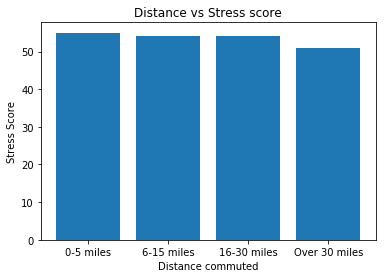

In [122]:
plt.bar(df['Distance'], df['Stress Score'])
plt.title("Distance vs Stress score")
plt.xlabel("Distance commuted")
plt.ylabel("Stress Score")
plt.show() 

This shows fairly similar stress levels over all the bands - This might have to be weighted differently to better model the link between distance and stress. 

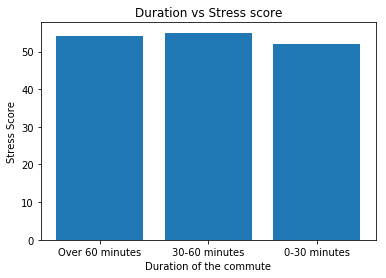

In [123]:
plt.bar(df['Duration'], df['Stress Score'])
plt.title("Duration vs Stress score")
plt.xlabel("Duration of the commute")
plt.ylabel("Stress Score")
plt.show() 

Again this is not as clear indication of increased stress linked to increasing duration of commute as I would like. Maybe the weightings for the duration score need adjusting. 

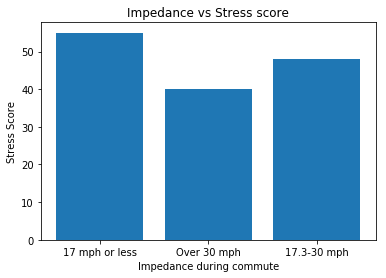

In [124]:
plt.bar(df['Impedance'], df['Stress Score'])
plt.title("Impedance vs Stress score")
plt.xlabel("Impedance during commute")
plt.ylabel("Stress Score")
plt.show() 

This looks to be of the right shaped needed to show that slower speed is correlated with greater stress levels. 

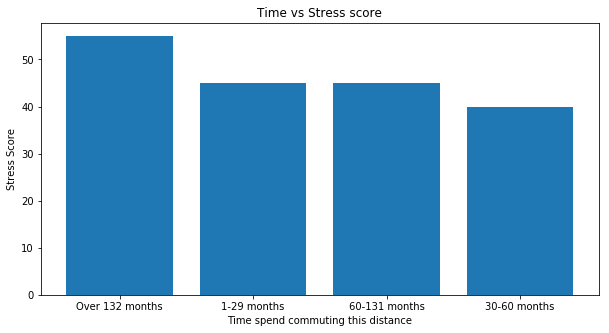

In [125]:
# labels are a bit squiched so use figsize
plt.figure(figsize=(10,5))
plt.bar(df['Time'], df['Stress Score'])
plt.title("Time vs Stress score")
plt.xlabel("Time spend commuting this distance")
plt.ylabel("Stress Score")
plt.show() 

This looks to be of the right shape at the over 132 months but the weightings may be off on the other time bands.

## References


American Psychological Association. (2010). Gender and Stress. Retrieved December 5, 2018, from https://www.apa.org/news/press/releases/stress/2010/gender-stress.aspx 

Beige, S. (2012). Analyses of commuting distances and times in the household context: The case of Berlin (Rep.). Retrieved December 8, 2018, from Institute of Transport Research, German Aerospace Centre, Berlin, Germany website: https://elib.dlr.de/76743/1/Beige_Analyses_of_commuting_distances_and_times_in_the_household_context_aktuell.pdf 

Büchel, B., & Corman, F. (2018, May 16). Modelling Probability Distributions of Public Transport Travel Time Components. In 18th Swiss Transport Research Conference. Retrieved December 11, 2018, from http://www.strc.ch/2018/Buechel_Corman.pdf doi:https://doi.org/10.3929/ethz-b-000263929 


Cassidy, T. (1992),Commuting-related Stress: Consequences and Implications, Employee Councelling Today, Vol. 4 Iss
2 pp. 15 - 21 Retrieved from https://www.researchgate.net/profile/AnthonyTony_Cassidy/publication/235250379_Commuting-related_Stress_Consequences_and_Implications/links/574da3f608ae061b3303533c/Commuting-related-Stress-Consequences-and-Implications.pdf


Central Statistics Office. (2017, August 31). Census of Population 2016 – Profile 6 Commuting in Ireland. Retrieved November 24, 2018, from https://www.cso.ie/en/releasesandpublications/ep/p-cp6ci/p6cii/p6noc/


Chatterjee, K., Clark, B., Martin, A. & Davis, A. (2017). The Commuting and Wellbeing Study: Understanding the Impact of Commuting on People’s Lives. UWE Bristol, UK. 

Civil and Enviromental Engineering Course. (2005). Relationships between Mean and Variance of Normal and Lognormal Distributions. Lecture presented at Probability and Statistics in Engineering. Retrieved December 9, 2018, from https://ocw.mit.edu/courses/civil-and-environmental-engineering/1-151-probability-and-statistics-in-engineering-spring-2005/lecture-notes/briefnts8_relnl.pdf 

Cohen, S., Kamarck,, T., & Mermelstein, R. (1983). Perceived Stress Scale. Retrieved December 5, 2018, from https://das.nh.gov/wellness/docs/percieved%20stress%20scale.pdf 

Cohen, S., Kamarck, T., & Mermelstein, R. (1983b). Perceived Stress Scale Questions. Retrieved from http://www.psy.cmu.edu/~scohen/PSS.html 


Gatersleben, B., & Uzzell, D. (2007). Affective Appraisals of the Daily Commute: Comparing Perceptions of Drivers, Cyclists, Walkers, and Users of Public Transport. Environment and Behavior, 39(3), 416–431. https://doi.org/10.1177/0013916506294032

Geistefeldt, J. (2015). Empirical Estimation of Desired Speed Distributions for Microscopic Traffic Simulation. Transportation Research Record: Journal of the Transportation Research Board, 2490(1), 41-46. doi:10.3141/2490-05 

Guessous, Y., Aron, M., Bhouri, N., & Cohen, S. (2014). Estimating Travel Time Distribution under Different Traffic Conditions. Transportation Research Procedia, 3, 339-348. doi:10.1016/j.trpro.2014.10.014 

Hassard, J., Teoh, K., Cox, T., Dewe, P., Cosma, M., Gründler, R., . . . Van den Broek, K. (2014). Calculating the cost of work-related stress and psychosocial risks (Rep.). Luxembourg: Publications Office of the European Union. doi:10.2802/20493

Johar, A., Jain, S. S., Garg, P. K., & Gundaliya, P. J. (2015). A study for Commuter Walk Distance from Bus Stops to Different Destination along Routes in Delhi. 12(59). doi:10.9737/hist.2018.658 


Kéry, M., & Royle, J. A. (2016). Applied hierarchical modeling in ecology: Analysis of distribution, abundance and species richness in R and BUGS. Retrieved from https://www.sciencedirect.com/topics/earth-and-planetary-sciences/data-simulation

Ma, Z., Ferreira, L., Mesbah, M., & Zhu, S. (2015). Modeling distributions of travel time variability for bus operations. Journal of Advanced Transportation, 50(1), 6-24. doi:10.1002/atr.1314 

Matplotlib community, (November 11, 2018) Matplotlib User Guide,Release 3.0.2 Retrieved from https://matplotlib.org/users/index.html

Maurya, A. K., Dey, S., & Das, S. (2015). Speed and Time Headway Distribution under Mixed Traffic Condition. Journal of the Eastern Asia Society for Transportation Studies, 11, 1774-1792. doi:https://doi.org/10.11175/easts.11.1774 


Monteiro, N.M. Shyngle K. Balogun & Kutlo N. Oratile (2014) Managing stress: the influence of gender, age and emotion regulation on coping among university students in Botswana, International Journal of Adolescence and Youth, 19:2, 153-173, DOI: 10.1080/02673843.2014.908784 

NumPy community, (2018). NumPy Reference Release 1.15.1.[ebook] Retrieved from https://docs.scipy.org/doc/numpy/numpy-ref-1.15.1.pdf

OECD Statistics Directorate. (2002, May 19). Glossary of Statistical Terms - Job Tenure. Retrieved December 9, 2018, from https://stats.oecd.org/glossary/detail.asp?ID=3661 

Oliphant, T. (2006). Guide to NumPy. 1st ed. [ebook] Available at: https://docs.scipy.org/doc/_static/numpybook.pdf [Accessed 20 Oct. 2018].


Pandas community, (August 06, 2018). pandas: powerful Python data analysis toolkit Release 0.23.4 [ebook] Retrieved from https://pandas.pydata.org/pandas-docs/stable/pandas.pdf

Papadopoulos, T. (1970). Measuring Job Tenure Using Linked Employer-Employee Data. Labour, Employment and Work in New Zealand. doi:10.26686/lew.v0i0.1618 

Patel, N. (2018, June 25). Why Modeling Churn is Difficult. Retrieved December 11, 2018, from https://neilpatel.com/blog/modeling-churn/ 

Plötz, P., Jakobsson, N., Sprei, F., & Karlsson, S. (2014). On the distribution of individual daily driving distances. European Electric Vehicle Congress Brussels, 101, 213-227. Retrieved December 11, 2018, from http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.870.8192&rep=rep1&type=pdf 

Reliability HotWire. (2005). Characteristics of the Lognormal Distribution. Retrieved December 8, 2018, from https://www.weibull.com/hotwire/issue47/relbasics47.htm 

Roberts, P. (2014, May 3). Employee Churn 202: Good and Bad Churn. Retrieved December 11, 2018, from https://www.kdnuggets.com/2014/05/employee-churn-202-good-bad-churn.html 

Salter R.J. (1989) Distribution of Highway Traffic Speeds, Fitting to a Normal Distribution. In: Traffic Engineering. Palgrave, London

Schaefer, A. (2005, October 01). Commuting Takes Its Toll. Retrieved December 6, 2018, from https://www.scientificamerican.com/article/commuting-takes-its-toll/ 

Stutzer, A., & Frey, B. S. (2008). Stress that Doesnt Pay: The Commuting Paradox*. Scandinavian Journal of Economics, 110(2), 339-366. doi:10.1111/j.1467-9442.2008.00542.x 

Stack Exchange, user Max. (2011, June). Calculating the parameters of a Beta distribution using the mean and variance. Retrieved from https://stats.stackexchange.com/questions/12232/calculating-the-parameters-of-a-beta-distribution-using-the-mean-and-variance

UCLA: Statistical Consulting Group. (n.d.). What is the difference between categorical, ordinal and interval variables? Retrieved December 5, 2018, from https://stats.idre.ucla.edu/other/mult-pkg/whatstat/what-is-the-difference-between-categorical-ordinal-and-interval-variables/ 

U.S.A, Department of Labour, Bureau of Labour and Statistics. (2018, September 20). Bureau of Labour and Statistics U.S. Department of Labour. Retrieved December 06, 2018, from https://www.bls.gov/news.release/pdf/tenure.pdf 


Van Ommeren, J. (2004, April 22). The Commuting Distribution (Rep.). Retrieved December 8, 2018, from Tinberge n Institute Discussion Paper website: https://papers.tinbergen.nl/04045.pdf 

Wener, R. E., & Evans, G. W. (2011). Comparing stress of car and train commuters. Transportation Research Part F: Traffic Psychology and Behaviour, 14(2), 111-116. doi:10.1016/j.trf.2010.11.008 

Weijschede, van der Straaten, J.W. & Rouwendal, Jan. (2011). Why are the commuting distances of power couples so short? An analysis of the location preferences of households. Retrieved December 11, 2018, from https://sbe.vu.nl/nl/Images/paper-rouwendal_tcm257-214783.pdf


Wikipedia contributors. (2018, May 31). Perceived Stress Scale. In Wikipedia, The Free Encyclopedia. Retrieved 11:47, December 5, 2018, from https://en.wikipedia.org/w/index.php?title=Perceived_Stress_Scale&oldid=843740320


Wikipedia contributors. (2018, September 17). Stochastic process. In Wikipedia, The Free Encyclopedia. Retrieved 11:19, November 24, 2018, from https://en.wikipedia.org/w/index.php?title=Stochastic_process&oldid=859982240


Wikipedia contributors. (2018, November 12). Fight-or-flight response. In Wikipedia, The Free Encyclopedia. Retrieved 00:59, December 4, 2018, from https://en.wikipedia.org/w/index.php?title=Fight-or-flight_response&oldid=868423450


Wikipedia contributors. (2018, November 23). Human sex ratio. In Wikipedia, The Free Encyclopedia. Retrieved 13:07, November 24, 2018, from https://en.wikipedia.org/w/index.php?title=Human_sex_ratio&oldid=870236802

Wikipedia contributors. (2018, November 26). Likert scale. In Wikipedia, The Free Encyclopedia. Retrieved 12:01, December 5, 2018, from https://en.wikipedia.org/w/index.php?title=Likert_scale&oldid=870626181

Wikipedia contributors. (2018, December 3). Churn rate. In Wikipedia, The Free Encyclopedia. Retrieved 15:27, December 11, 2018, from https://en.wikipedia.org/w/index.php?title=Churn_rate&oldid=871855949
